In [1]:
from ROOT import *
from math import *
import os
import sys
gROOT.ProcessLine(".x lhcbstyle.C")
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.22/08


In [2]:
file = TFile("Perf_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning.root","read")
tree = file.Get("t")
tree.Print()

******************************************************************************
*Tree    :t         : t                                                      *
*Entries :    57925 : Total =         3027413 bytes  File  Size =    1696637 *
*        :          : Tree compression factor =   1.78                       *
******************************************************************************
*Br    0 :Evt       : Evt/I                                                  *
*Entries :    57925 : Total  Size=     232713 bytes  File Size  =      33824 *
*Baskets :        8 : Basket Size=      32000 bytes  Compression=   6.87     *
*............................................................................*
*Br    1 :True_PV_nTcks : True_PV_nTcks/I                                    *
*Entries :    57925 : Total  Size=     232833 bytes  File Size  =      81045 *
*Baskets :        8 : Basket Size=      32000 bytes  Compression=   2.87     *
*...................................................

10098

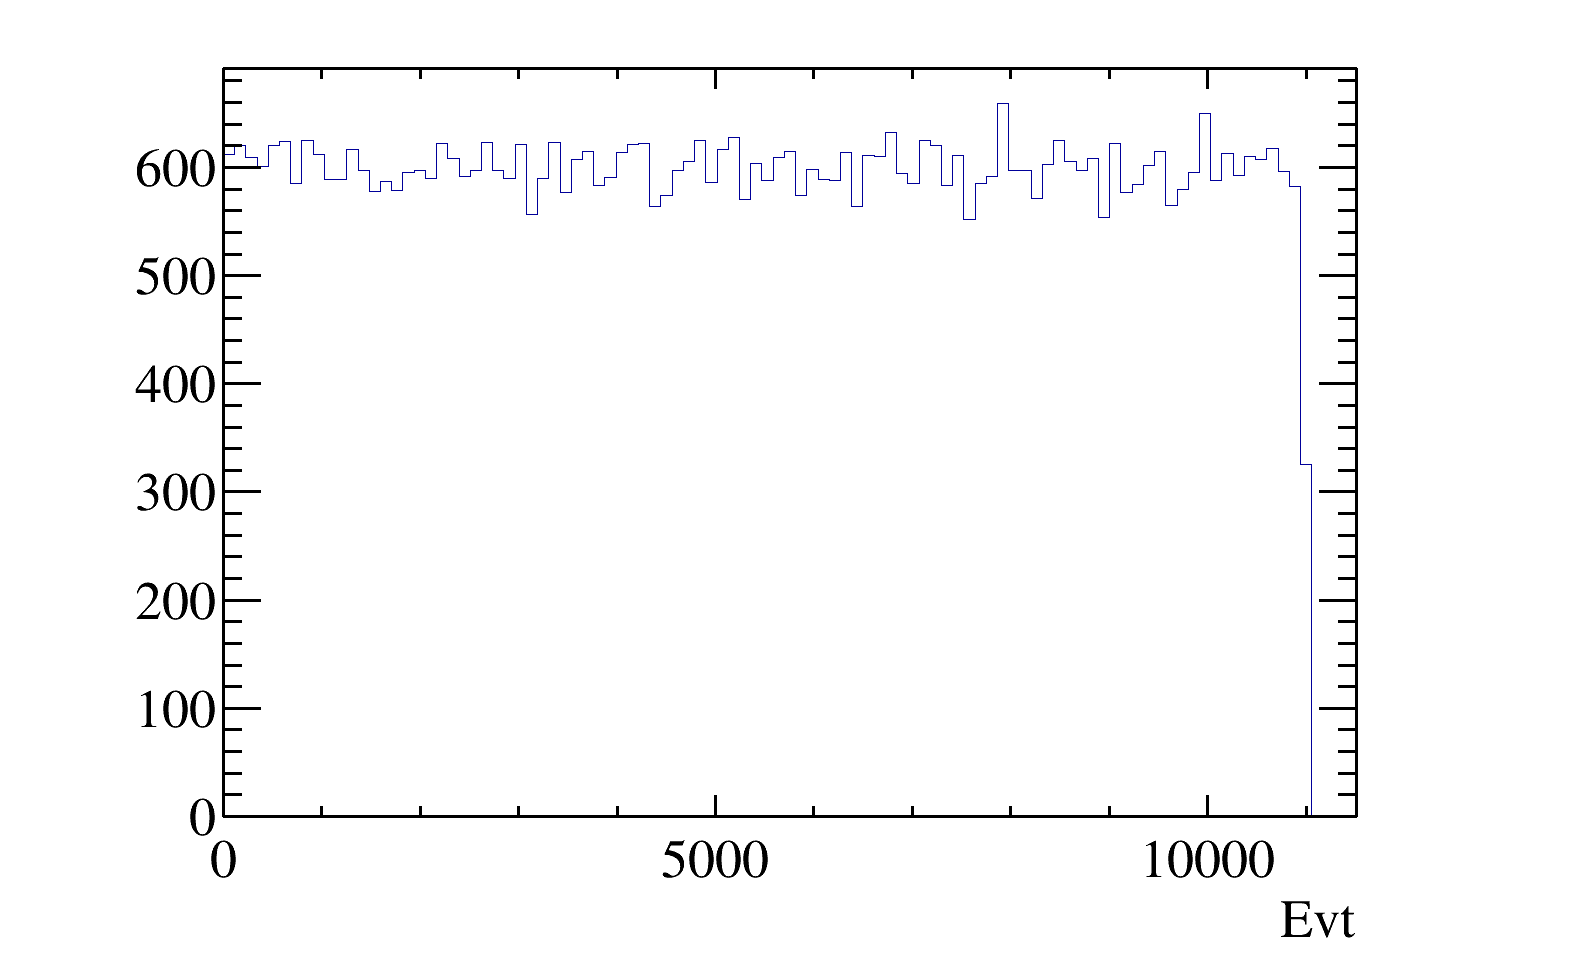

In [3]:
c = TCanvas("c","c",1600,1000)
tree.Draw("Evt")
c.Draw()
tree.GetEntry(53121)
tree.Evt

In [4]:
S = tree.GetEntries("PV_match==1")
M = tree.GetEntries("PV_match==0")
FP = tree.GetEntries("PV_match==-1")

In [5]:
print("S = %d, M = %d, FP = %d"%(S,M,FP))

S = 55941, M = 1645, FP = 339


In [6]:
S+M

57586

In [7]:
M/float(S+M)

0.028565970895703816

In [8]:
S/float(S+M)

0.9714340291042962

In [9]:
FP/float(FP+S)

0.006023454157782516

In [10]:
FP/10000

0.0339

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/Efficiency.pdf has been created


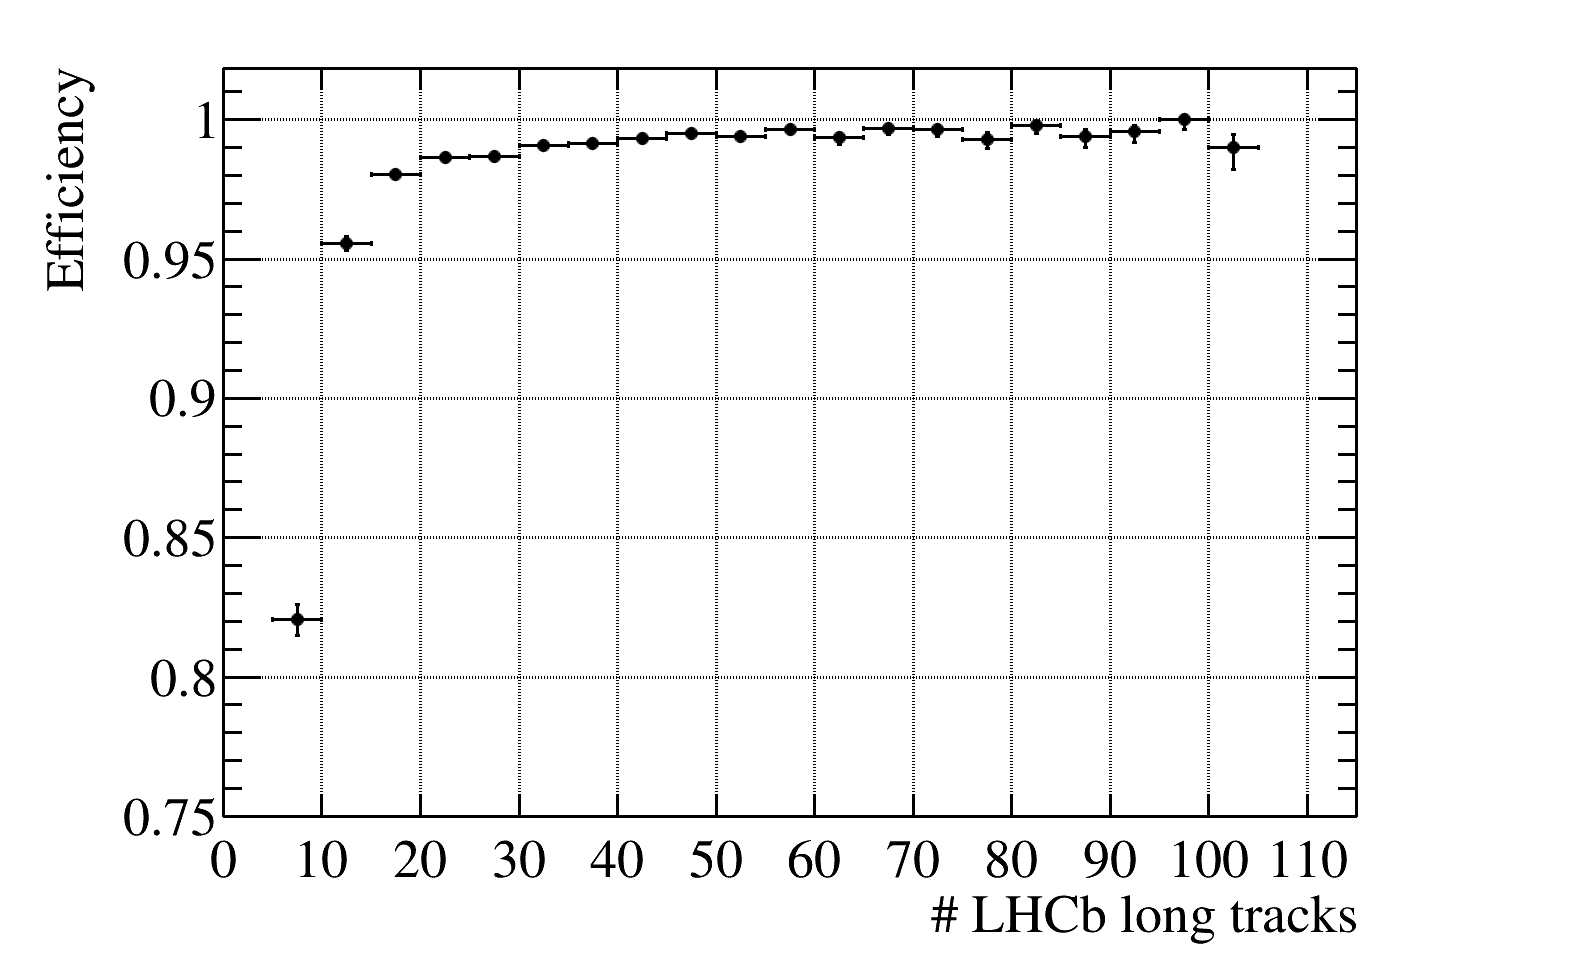

In [11]:
nbins = 20
c = TCanvas("c","c",1600,1000)
pEff = TEfficiency("eff","eff;# LHCb long tracks;Efficiency",nbins,5,105)
bPassed = False
for i in range(int(tree.GetEntries())):
    tree.GetEntry(i)
    matched = tree.PV_match
    if matched >= 0:
        n_tracks = tree.True_PV_nTcks
        #print("Evt[%d]: match=%d,  True_PV_nTcks=%d"%(i, matched, n_tracks))
        pEff.Fill(matched,n_tracks)

#pEff.GetYaxis().SetMinimum(0.5)
pEff.SetFillColor(38)
#c.SetLogy()

pEff.Draw("AP")
gPad.Update()
graph = pEff.GetPaintedGraph()
graph.SetMinimum(0.75)
graph.GetXaxis().SetNdivisions(12)
#teff.GetYaxis().SetMinimum(0.5)
c.SetGrid(1)
c.Draw()
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/Efficiency.pdf")
#for i in range(nbins):
#    print("Eff bin[%d] = %.3f + %.3f - %.3f"%(i, pEff.GetEfficiency(i), pEff.GetEfficiencyErrorUp(i), pEff.GetEfficiencyErrorLow(i)))

In [12]:
for i in range(5,100,5):
    nFound = float(tree.GetEntries("True_PV_nTcks>%s && True_PV_nTcks<=%s &&PV_match==1"%(i,i+5)))
    nTot   = float(tree.GetEntries("True_PV_nTcks>%s && True_PV_nTcks<=%s "%(i,i+5)))
    eff    = nFound/nTot
    print("Efficiency for %d<N(tracks)<=%d = %.3f"%(i,i+5,eff))


Efficiency for 5<N(tracks)<=10 = 0.872
Efficiency for 10<N(tracks)<=15 = 0.965
Efficiency for 15<N(tracks)<=20 = 0.982
Efficiency for 20<N(tracks)<=25 = 0.988
Efficiency for 25<N(tracks)<=30 = 0.987
Efficiency for 30<N(tracks)<=35 = 0.989
Efficiency for 35<N(tracks)<=40 = 0.992
Efficiency for 40<N(tracks)<=45 = 0.993
Efficiency for 45<N(tracks)<=50 = 0.996
Efficiency for 50<N(tracks)<=55 = 0.995
Efficiency for 55<N(tracks)<=60 = 0.997
Efficiency for 60<N(tracks)<=65 = 0.994
Efficiency for 65<N(tracks)<=70 = 0.997
Efficiency for 70<N(tracks)<=75 = 0.995
Efficiency for 75<N(tracks)<=80 = 0.995
Efficiency for 80<N(tracks)<=85 = 0.995
Efficiency for 85<N(tracks)<=90 = 0.996
Efficiency for 90<N(tracks)<=95 = 0.997
Efficiency for 95<N(tracks)<=100 = 1.000


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/TruePVs_Ntracks.pdf has been created


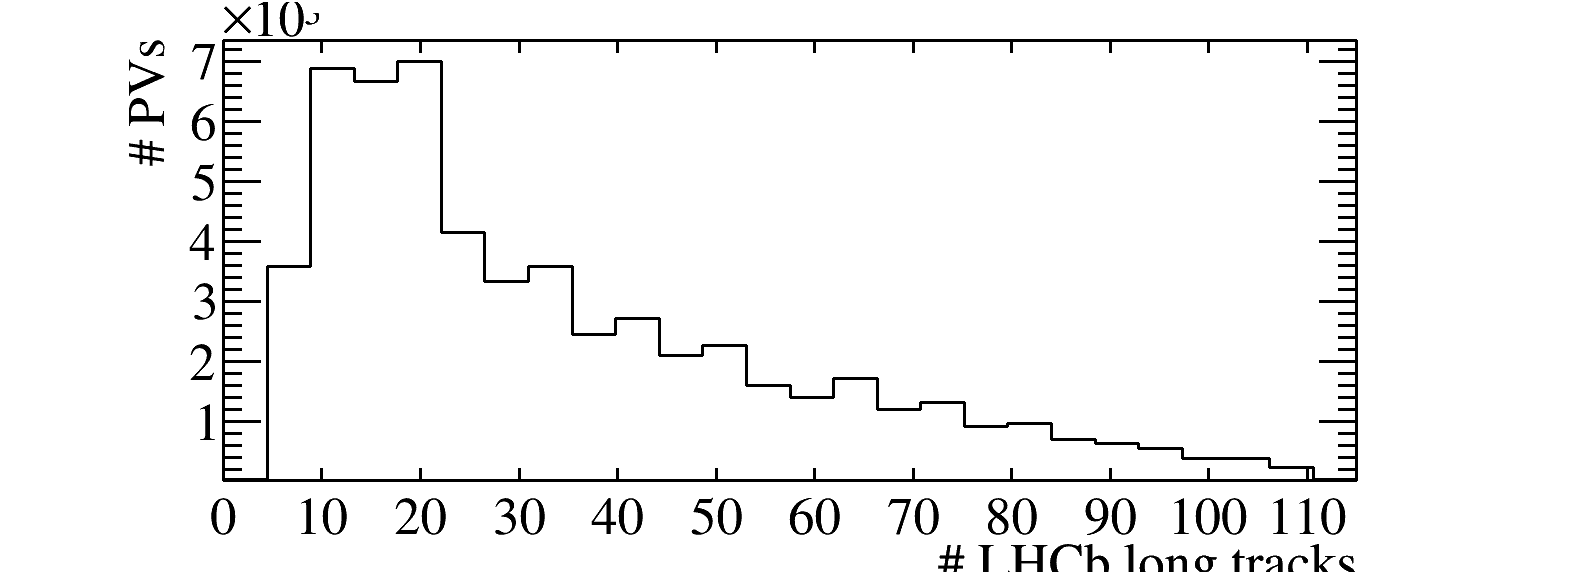

In [13]:
#gStyle.SetPadBottomMargin(0.20)
#gStyle.SetPadTopMargin(0.20)
c4 = TCanvas("c","c",1600,600)
h1 = TH1D("NTracks","NTracks",nbins+6,0,115)
h1.SetXTitle("# LHCb long tracks")
h1.SetYTitle("# PVs")
h1.SetMinimum(10)
h1.GetYaxis().SetMaxDigits(3)
h1.GetYaxis().SetTitleOffset(0.3)
h1.GetYaxis().SetTitleSize(0.10)
h1.GetYaxis().SetLabelSize(0.10)

h1.GetXaxis().SetNdivisions(12)
h1.GetXaxis().SetTitleOffset(0.95)
h1.GetXaxis().SetTitleSize(0.10)
h1.GetXaxis().SetLabelSize(0.10)

tree.Draw("True_PV_nTcks>>NTracks","PV_match>=0 && True_PV_nTcks<=110")
#tree.Project("NTracks","True_PV_nTcks","PV_match>=0 && True_PV_nTcks<=80")
#c4.SetLogy()
c4.Draw()
c4.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/TruePVs_Ntracks.pdf")

gStyle.SetPadBottomMargin(0.16)
gStyle.SetPadTopMargin(0.07)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


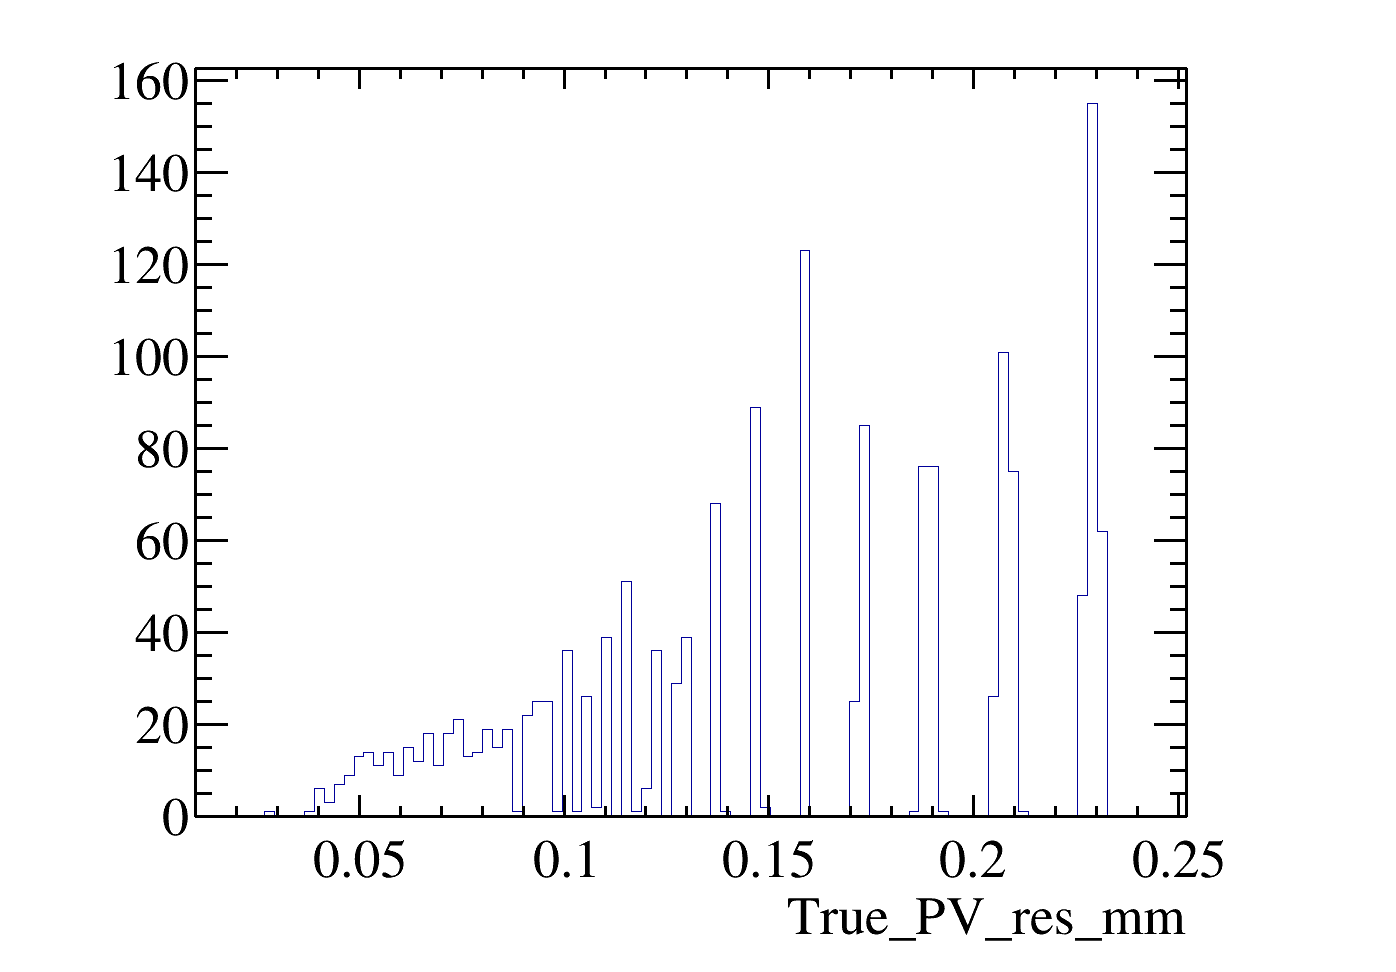

In [14]:
c = TCanvas("c","c",1400,1000)
tree.Draw("True_PV_res_mm","PV_match==0")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/TrueRes_RecRes_Compared.pdf has been created


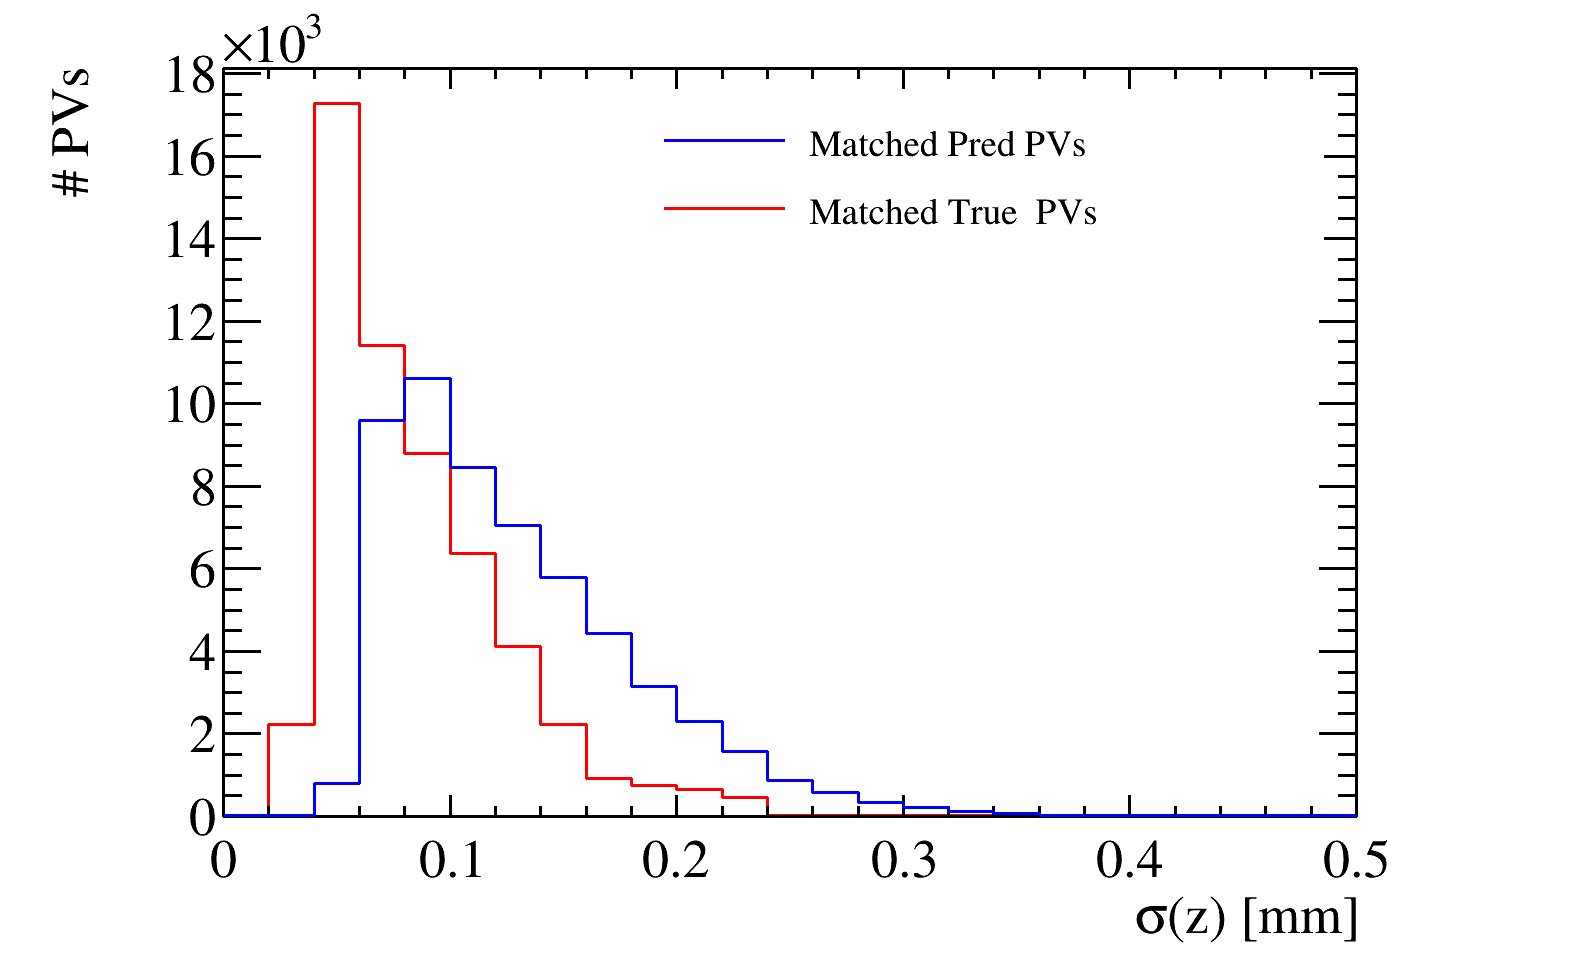

In [15]:
c = TCanvas("c","c",1600,1000)
h1 = TH1D("RecResS","RecResS",25,0,0.5)
h1.SetXTitle("#sigma(z) [mm]")
h1.SetYTitle("# PVs")
h1.GetYaxis().SetMaxDigits(3)
h1.SetLineColor(kBlue)
tree.Draw("Pred_PV_matched_res_mm>>RecResS","PV_match==1")

h3 = TH1D("RecResFP","RecResFP",25,0,0.5)
h3.SetXTitle("#sigma(z) [mm]")
h3.SetYTitle("# PVs")
h3.GetYaxis().SetMaxDigits(3)
h3.SetLineColor(kGreen+2)
tree.Draw("Pred_PV_FP_res_mm>>RecResFP","PV_match==-1")
h3.Scale(5)

h2 = TH1D("TrueResS","TrueResS",25,0,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("# PVs")
h2.SetLineColor(kRed)
#h2.SetMinimum(50)
#h2.GetXaxis().SetNdivisions(12)
h2.GetYaxis().SetMaxDigits(3)
tree.Draw("True_PV_res_mm>>TrueResS","PV_match==1","same")

h4 = TH1D("TrueResM","TrueResM",25,0,0.5)
h4.SetXTitle("#sigma(z) [mm]")
h4.SetYTitle("# PVs")
h4.SetLineColor(kMagenta)
#h4.SetMinimum(50)
#h4.GetXaxis().SetNdivisions(12)
h4.GetYaxis().SetMaxDigits(3)
tree.Draw("True_PV_res_mm>>TrueResM","PV_match==0","same")
h4.Scale(5)

h2.Draw("")
h1.Draw("same")
#h3.Draw("same")
#h4.Draw("same")

leg = TLegend(0.4,0.75,0.83,0.89)
leg.SetTextFont(132)
leg.AddEntry(h1,"Matched Pred PVs","L")
leg.AddEntry(h2,"Matched True  PVs","L")
leg.Draw("same")

c.Draw()
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/TrueRes_RecRes_Compared.pdf")


 FCN=1647.81 FROM MIGRAD    STATUS=CONVERGED      81 CALLS          82 TOTAL
                     EDM=8.31417e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.58197e+03   5.18214e+01   7.37018e-01  -7.51101e-07
   2  p1          -4.16563e-02   4.30356e-03   8.51130e-05   3.18635e-03
   3  p2           9.91050e-01   4.16868e-03   5.92125e-05   5.60155e-05


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ_over_TrueRes.pdf has been created


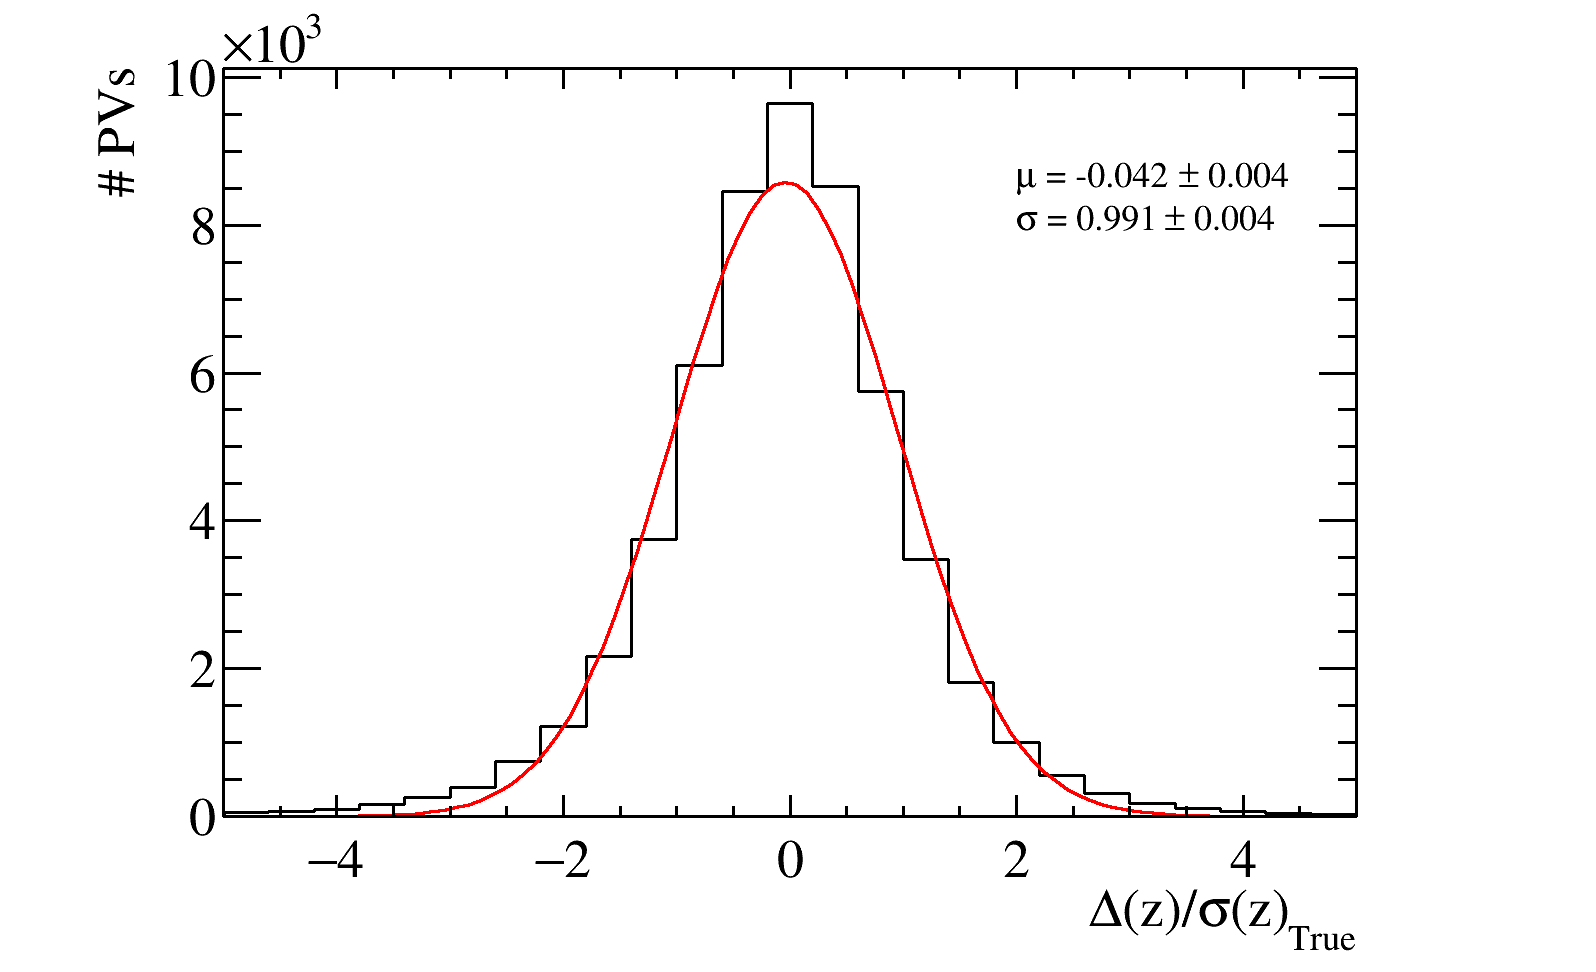

In [16]:
c = TCanvas("c","c",1600,1000)
h1 = TH1D("DeltaZ_over_TrueRes","DeltaZ_over_TrueRes",25,-5,5)
h1.SetXTitle("#Delta(z)/#sigma(z)_{True}")
h1.SetYTitle("# PVs")
h1.GetYaxis().SetMaxDigits(3)
h1.GetYaxis().SetTitleOffset(0.7)
tree.Draw("(True_PV_dz_mm)/True_PV_res_mm>>DeltaZ_over_TrueRes","PV_match==1")
f1 = TF1("f1","gaus(x)",-5,5)
f1.SetParameter(0,10000)
f1.SetParameter(1,0)
f1.SetParameter(2,0.6)
f1.SetLineColor(kRed)
h1.Fit("f1")
myt = TLatex(2,h1.GetMaximum()*0.85,"#splitline{#mu = %.3f #pm %.3f}{#sigma = %.3f #pm %.3f}"%(f1.GetParameter(1), f1.GetParError(1), f1.GetParameter(2), f1.GetParError(2)))
myt.SetTextFont(132)
myt.SetTextSize(0.04)
myt.Draw("same")
c.Draw()
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ_over_TrueRes.pdf")


 FCN=1090.2 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=4.93233e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.36451e+04   7.80436e+01   9.39690e-01  -3.14798e-07
   2  p1          -2.56785e-02   2.74276e-03   4.41809e-05  -3.24933e-02
   3  p2           6.41472e-01   2.44073e-03   2.93682e-05  -2.50475e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ_over_RecRes.pdf has been created


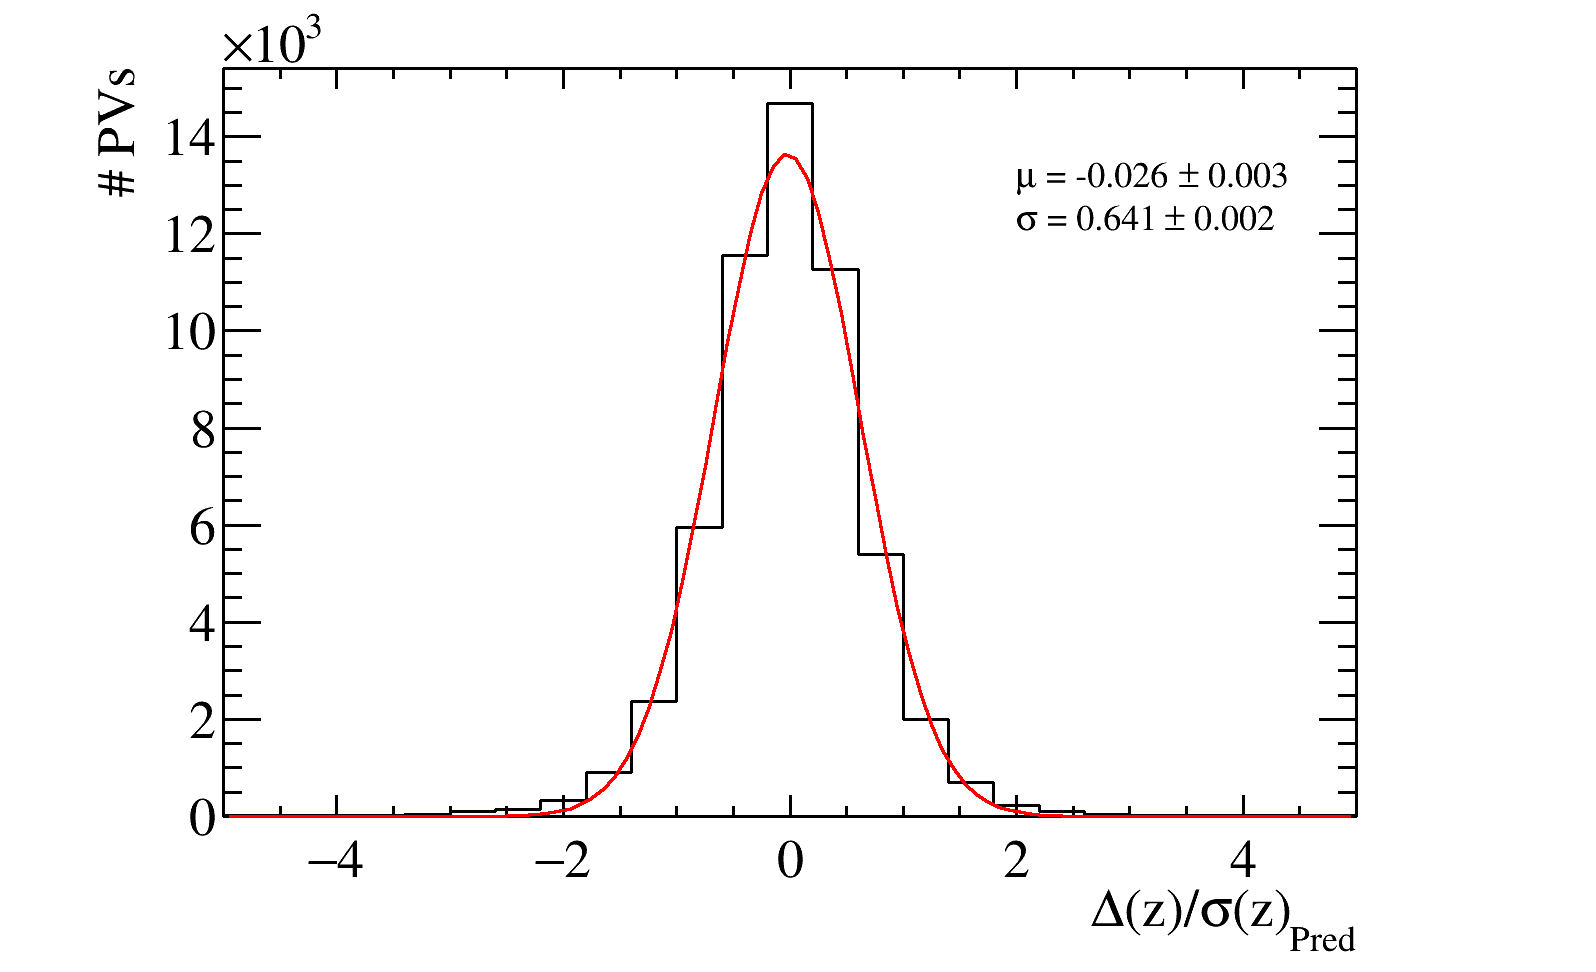

In [17]:
c = TCanvas("c","c",1600,1000)
h1 = TH1D("DeltaZ_over_RecRes","DeltaZ_over_RecRes",25,-5,5)
h1.SetXTitle("#Delta(z)/#sigma(z)_{Pred}")
h1.SetYTitle("# PVs")
h1.GetYaxis().SetMaxDigits(3)
h1.GetYaxis().SetTitleOffset(0.7)
tree.Draw("(True_PV_dz_mm)/Pred_PV_matched_res_mm>>DeltaZ_over_RecRes","PV_match==1")
f1 = TF1("f1","gaus(x)",-5,5)
f1.SetParameter(0,10000)
f1.SetParameter(1,0)
f1.SetParameter(2,0.6)
f1.SetLineColor(kRed)
gPad.Update()
h1.Fit("f1")
gPad.Update()
f1.Draw("same")
gPad.Update()
myt = TLatex(2,h1.GetMaximum()*0.85,"#splitline{#mu = %.3f #pm %.3f}{#sigma = %.3f #pm %.3f}"%(f1.GetParameter(1), f1.GetParError(1), f1.GetParameter(2), f1.GetParError(2)))
myt.SetTextFont(132)
myt.SetTextSize(0.04)
gPad.Update()
myt.Draw("same")
gPad.Update()
c.Draw()
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ_over_RecRes.pdf")


 FCN=3966.77 FROM MIGRAD    STATUS=CONVERGED     693 CALLS         694 TOTAL
                     EDM=5.52043e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.11970e+04   7.45349e+01   1.51617e+00   3.20877e-06
   2  p1          -2.73746e-03   3.24101e-04   9.95630e-06  -8.62949e-01
   3  p2          -7.35251e-02   3.67113e-04   7.46401e-06  -6.84473e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ.pdf has been created


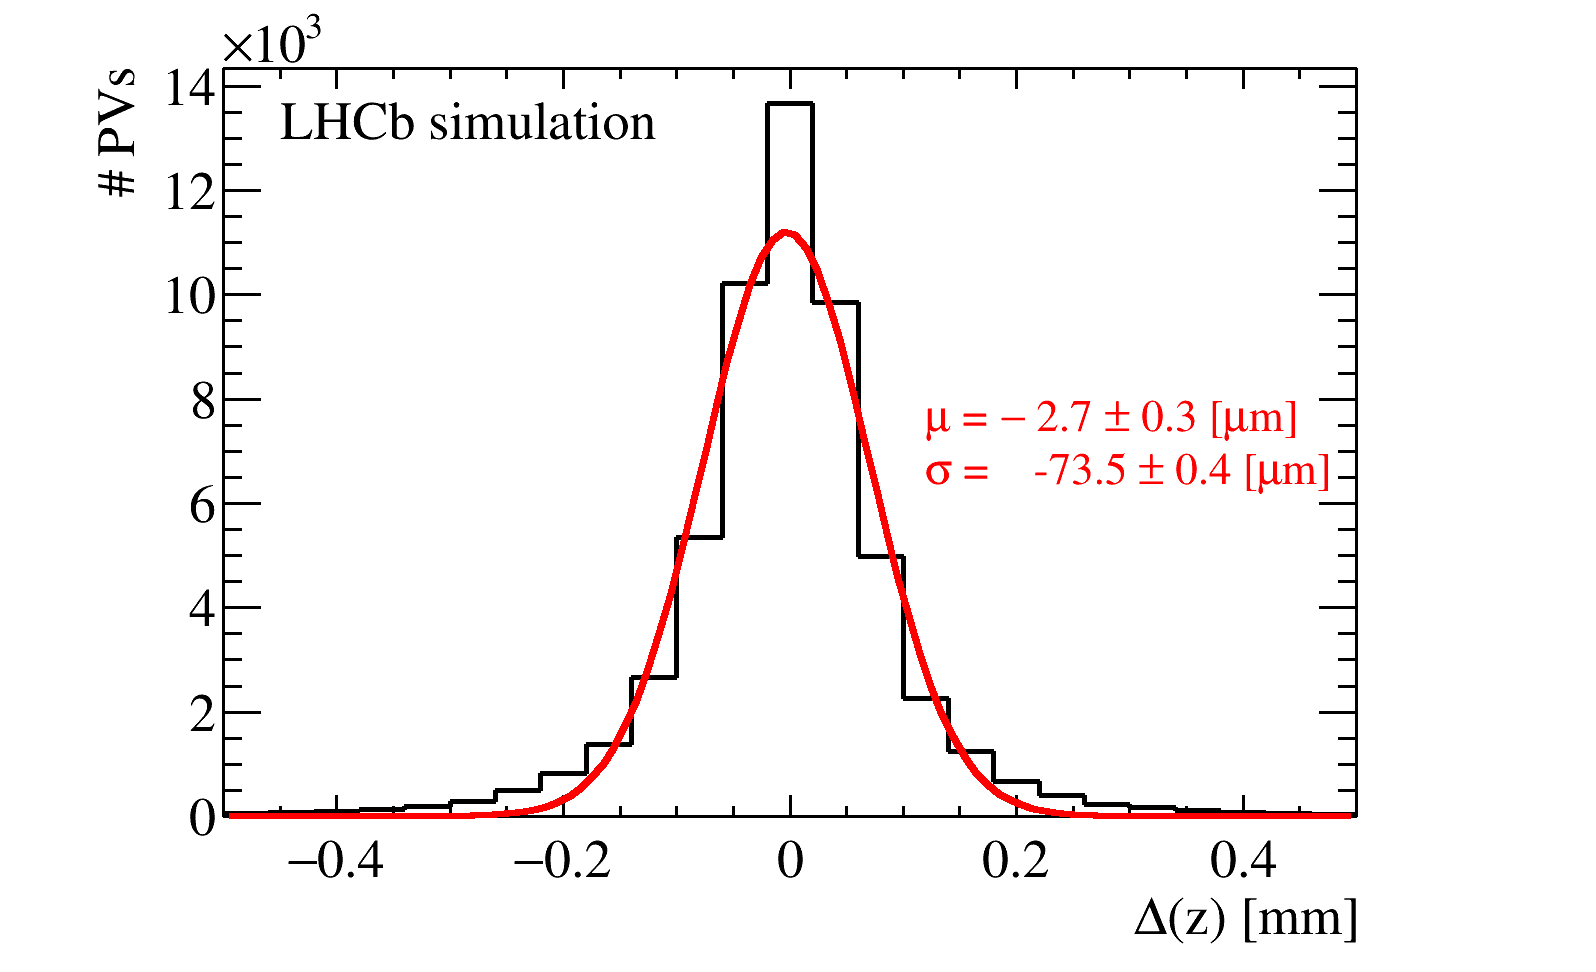

In [18]:
c = TCanvas("c","c",1600,1000)
h1 = TH1D("DeltaZ","DeltaZ",25,-0.5,0.5)
h1.SetXTitle("#Delta(z) [mm]")
h1.SetYTitle("# PVs")
h1.SetLineWidth(5)
h1.GetYaxis().SetMaxDigits(3)
h1.GetYaxis().SetTitleOffset(0.7)
tree.Draw("(True_PV_dz_mm)>>DeltaZ","PV_match==1")
f1 = TF1("f1","gaus(x)",-5,5)
f1.SetParameter(0,10000)
f1.SetParameter(1,0)
f1.SetParameter(2,0.6)
f1.SetLineColor(kRed)
f1.SetLineWidth(6)
gPad.Update()
h1.Fit("f1")
gPad.Update()
f1.Draw("same")
gPad.Update()
myt = TLatex(0.12,h1.GetMaximum()*0.5,"#splitline{#mu = #minus %.1f #pm %.1f [#mu #kern[-0.4]{m}]}{#sigma =    %.1f #pm %.1f [#mu #kern[-0.4]{m}]}"%(abs(f1.GetParameter(1)*1000), f1.GetParError(1)*1000, f1.GetParameter(2)*1000, f1.GetParError(2)*1000))
myt.SetTextFont(132)
myt.SetTextSize(0.05)
myt.SetTextColor(kRed)
gPad.Update()
myt.Draw("same")
lhcb = TLatex(-0.45,h1.GetMaximum()*0.95,"LHCb simulation")
lhcb.SetTextFont(132)
lhcb.SetTextSize(0.06)
#lhcb.SetTextColor(kRed)
gPad.Update()
lhcb.Draw("same")
gPad.Update()
c.Draw()
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ_over_TrueRes_VS_nTracks.pdf has been created


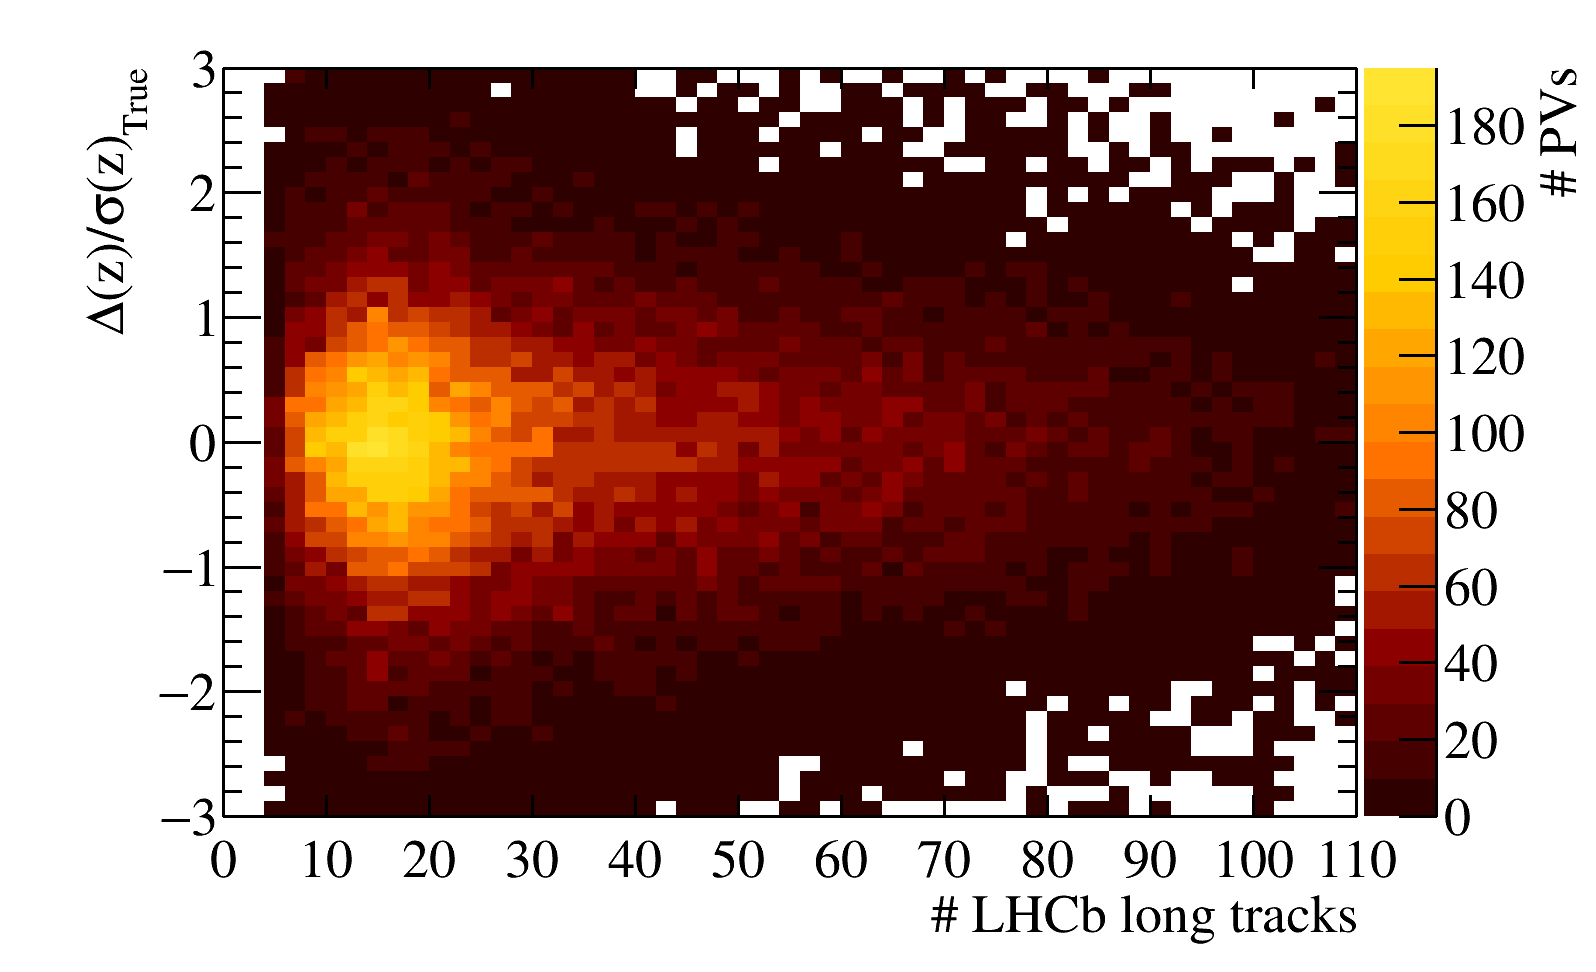

In [19]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("DeltaZ_over_TrueRes_VS_nTracks","DeltaZ_over_TrueRes_VS_nTracks",55,0,110,50,-3,3)
h2.SetXTitle("# LHCb long tracks")
h2.SetYTitle("#Delta(z)/#sigma(z)_{True}")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetYaxis().SetTitleOffset(0.7)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)/True_PV_res_mm):True_PV_nTcks>>DeltaZ_over_TrueRes_VS_nTracks","PV_match==1","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ_over_TrueRes_VS_nTracks.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ_over_RecRes_VS_nTracks.pdf has been created


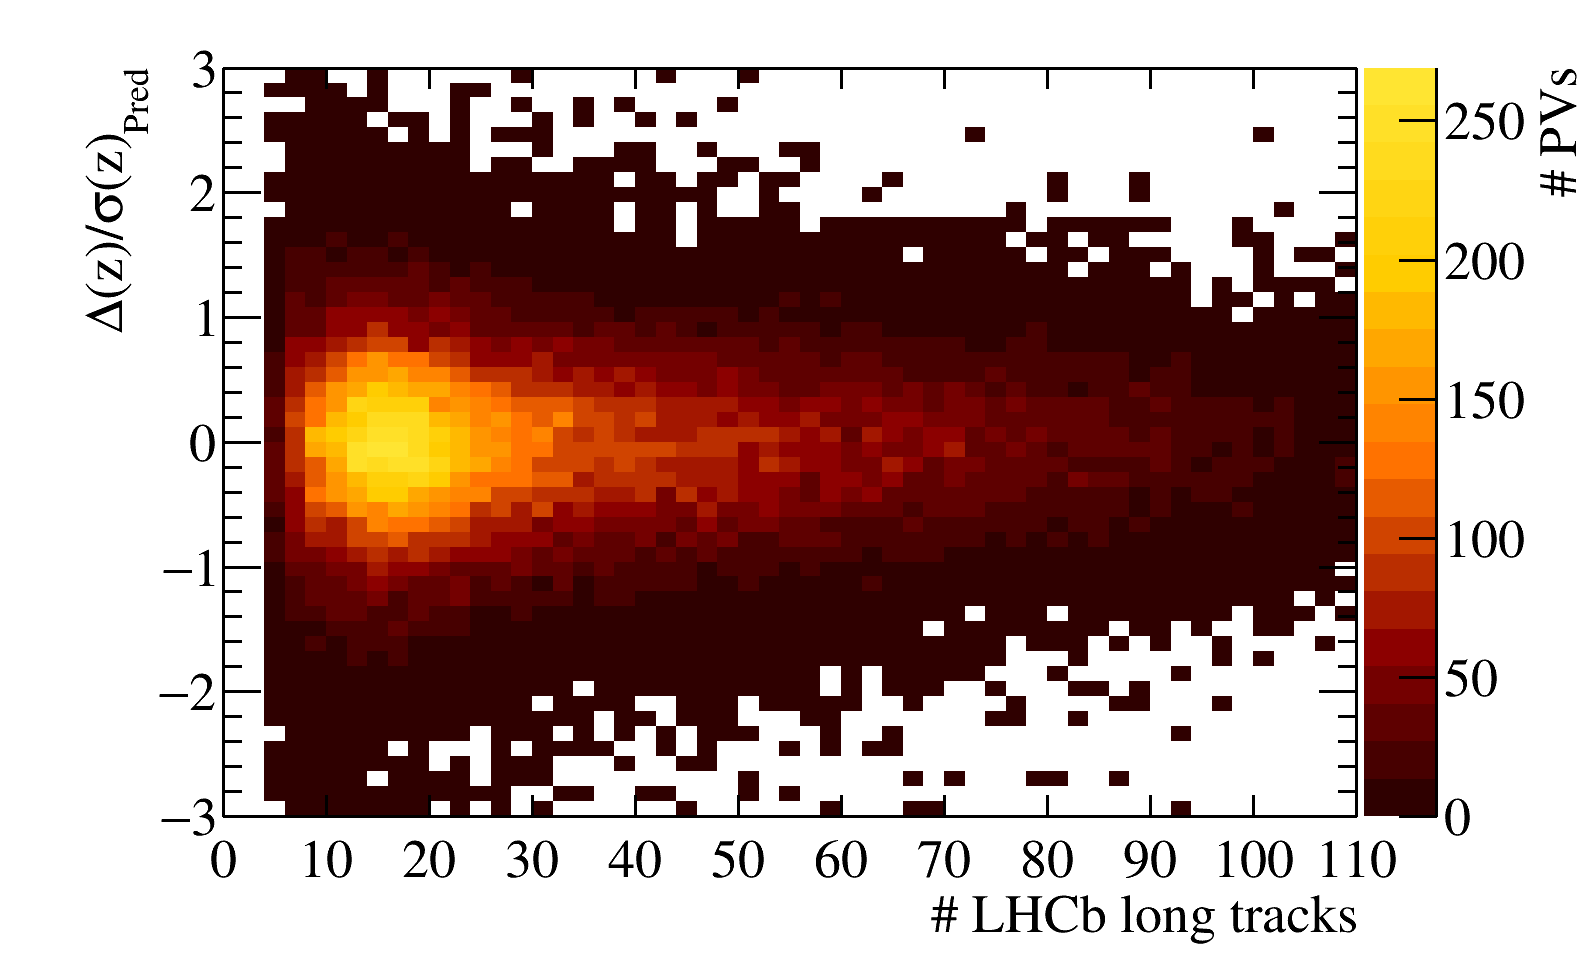

In [20]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("DeltaZ_over_RecRes_VS_nTracks","DeltaZ_over_RecRes_VS_nTracks",55,0,110,50,-3,3)
h2.SetXTitle("# LHCb long tracks")
h2.SetYTitle("#Delta(z)/#sigma(z)_{Pred}")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetYaxis().SetTitleOffset(0.7)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)/Pred_PV_matched_res_mm):True_PV_nTcks>>DeltaZ_over_RecRes_VS_nTracks","PV_match==1","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/DeltaZ_over_RecRes_VS_nTracks.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_over_TrueRes_VS_nTracks.pdf has been created


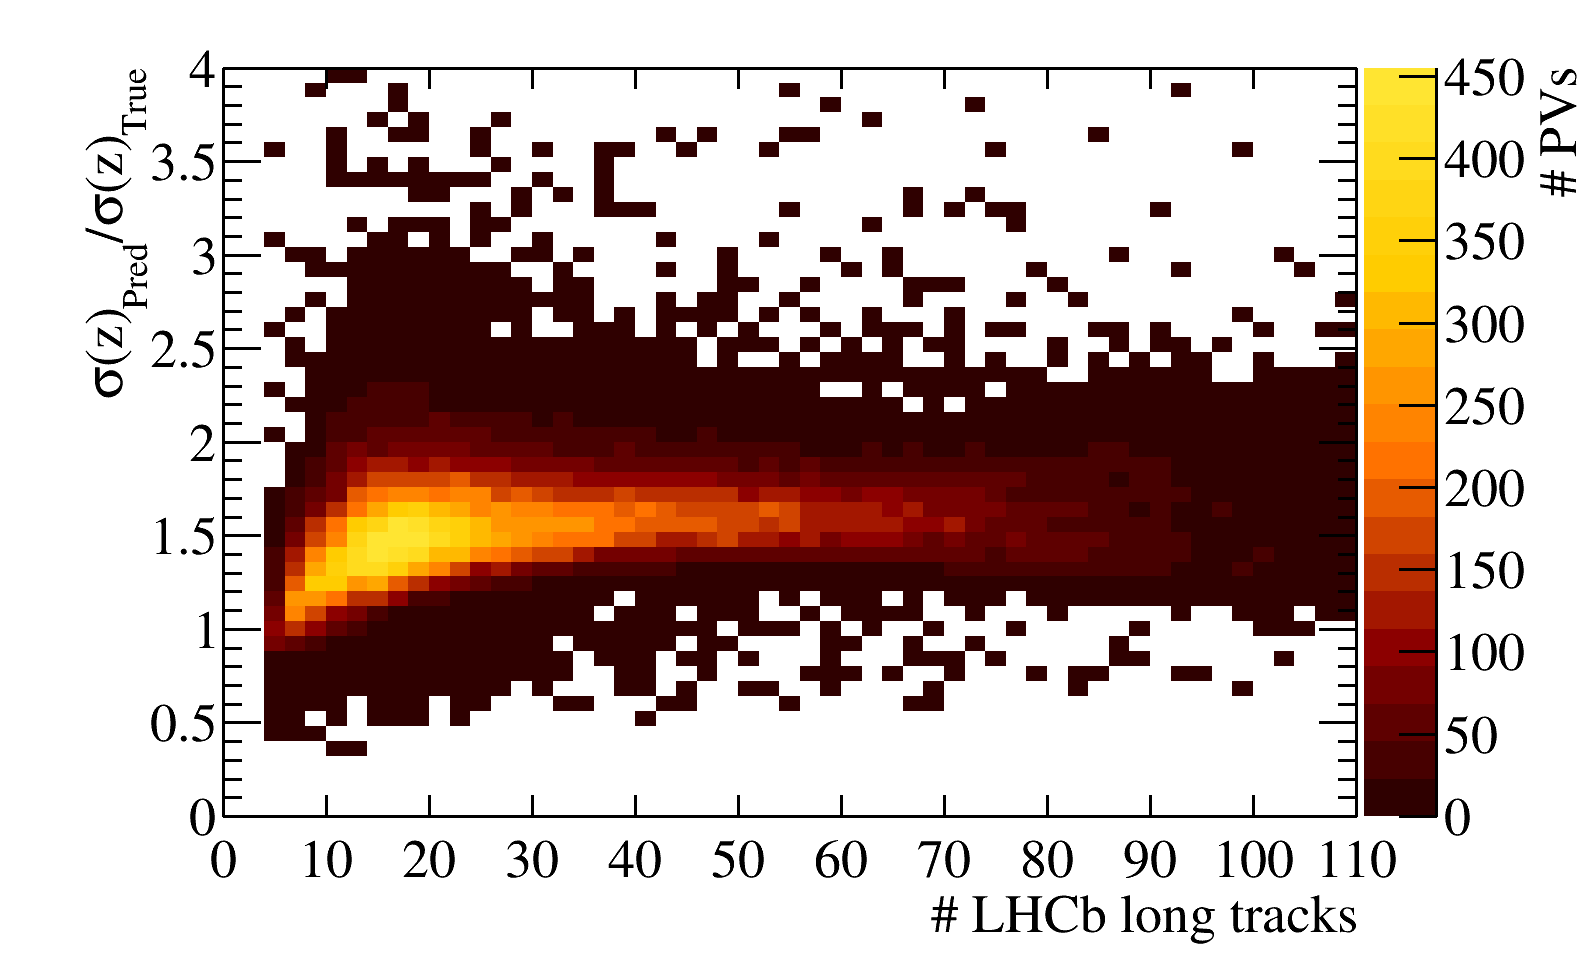

In [21]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("True_over_RecRes_VS_nTracks","True_over_RecRes_VS_nTracks",55,0,110,50,0,4)
h2.SetXTitle("# LHCb long tracks")
h2.SetYTitle("#sigma(z)_{Pred}/#sigma(z)_{True}")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetYaxis().SetTitleOffset(0.7)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((Pred_PV_matched_res_mm)/True_PV_res_mm):True_PV_nTcks>>True_over_RecRes_VS_nTracks","PV_match==1","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_over_TrueRes_VS_nTracks.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_nTracks.pdf has been created


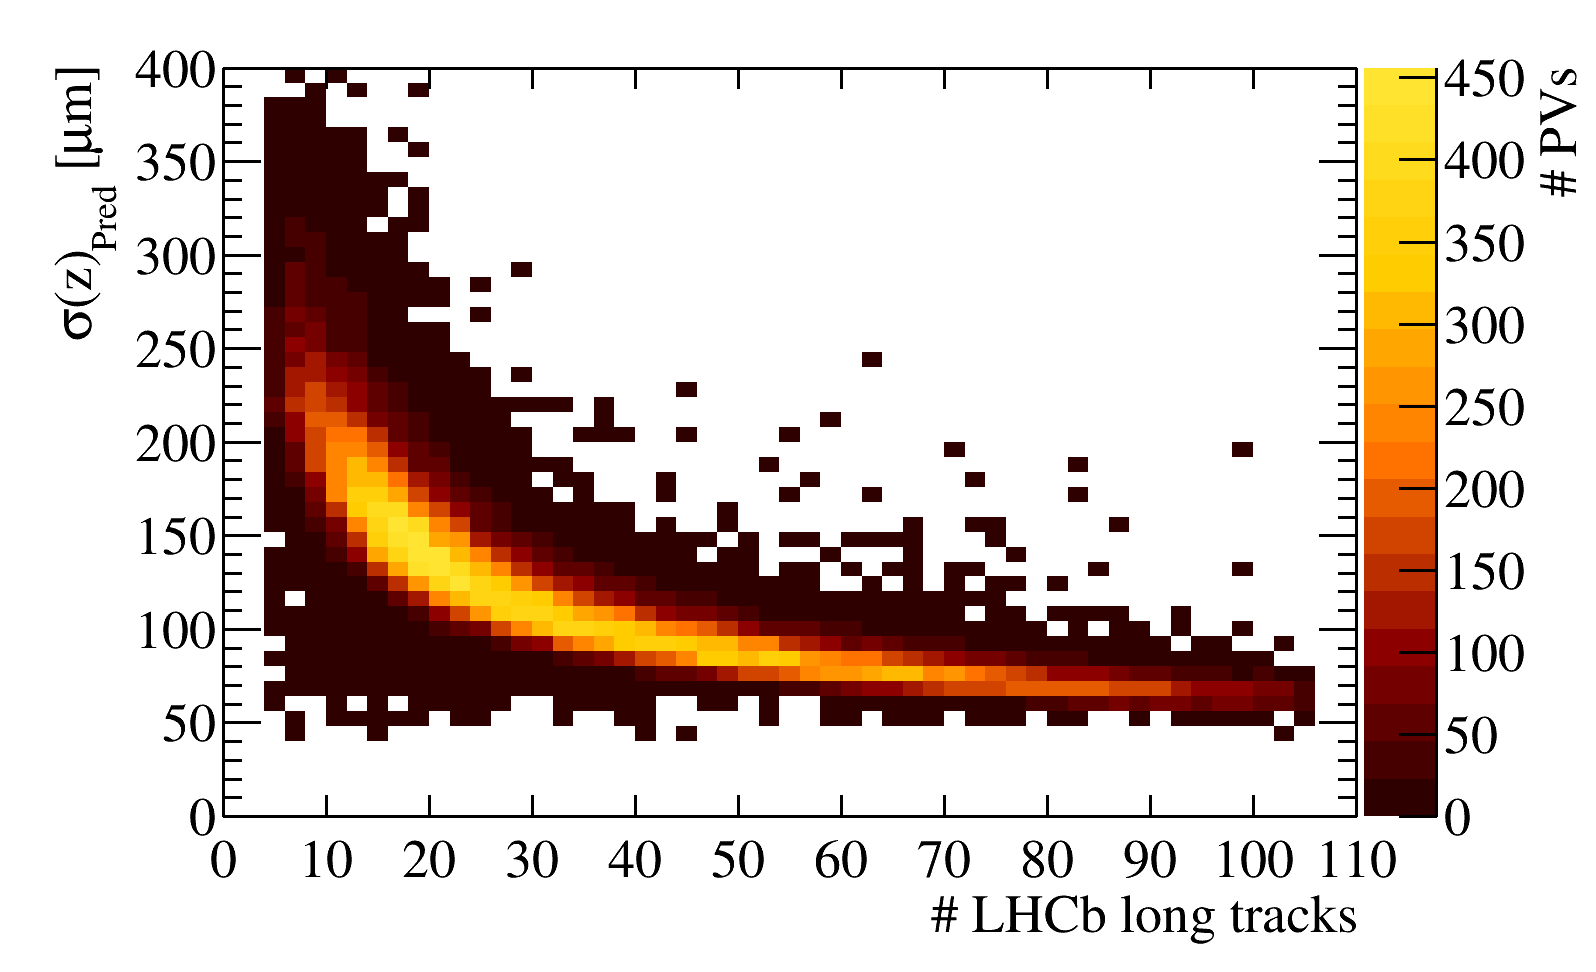

In [22]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_nTracks","RecRes_VS_nTracks",55,0,110,50,0,400)
h2.SetXTitle("# LHCb long tracks")
h2.SetYTitle("#sigma(z)_{Pred} [#mu #kern[-0.4]{m}]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((Pred_PV_matched_res_mm)*1000):True_PV_nTcks>>RecRes_VS_nTracks","PV_match==1 && True_PV_nTcks<105 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_nTracks.pdf")



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/TrueRes_VS_nTracks.pdf has been created


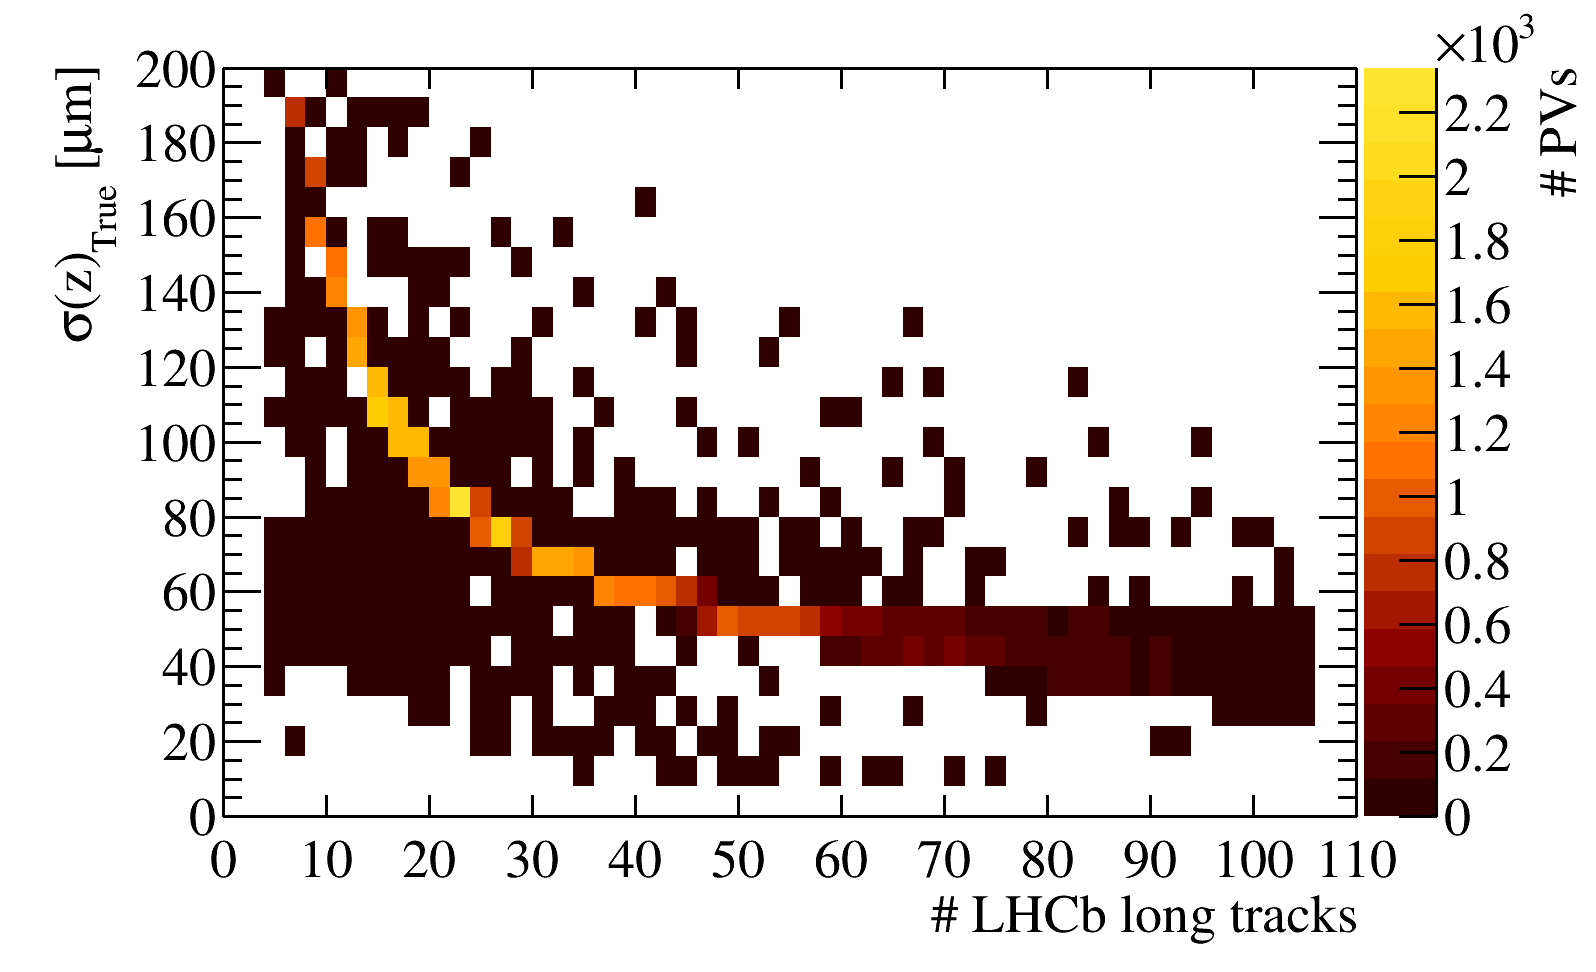

In [23]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("TrueRes_VS_nTracks","TrueRes_VS_nTracks",55,0,110,25,0,200)
h2.SetXTitle("# LHCb long tracks")
h2.SetYTitle("#sigma(z)_{True} [#mu #kern[-0.4]{m}]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_res_mm)*1000):True_PV_nTcks>>TrueRes_VS_nTracks","PV_match==1  && True_PV_res_mm*1000<200 && True_PV_nTcks<105 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/TrueRes_VS_nTracks.pdf")



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_5_10_o.pdf has been created


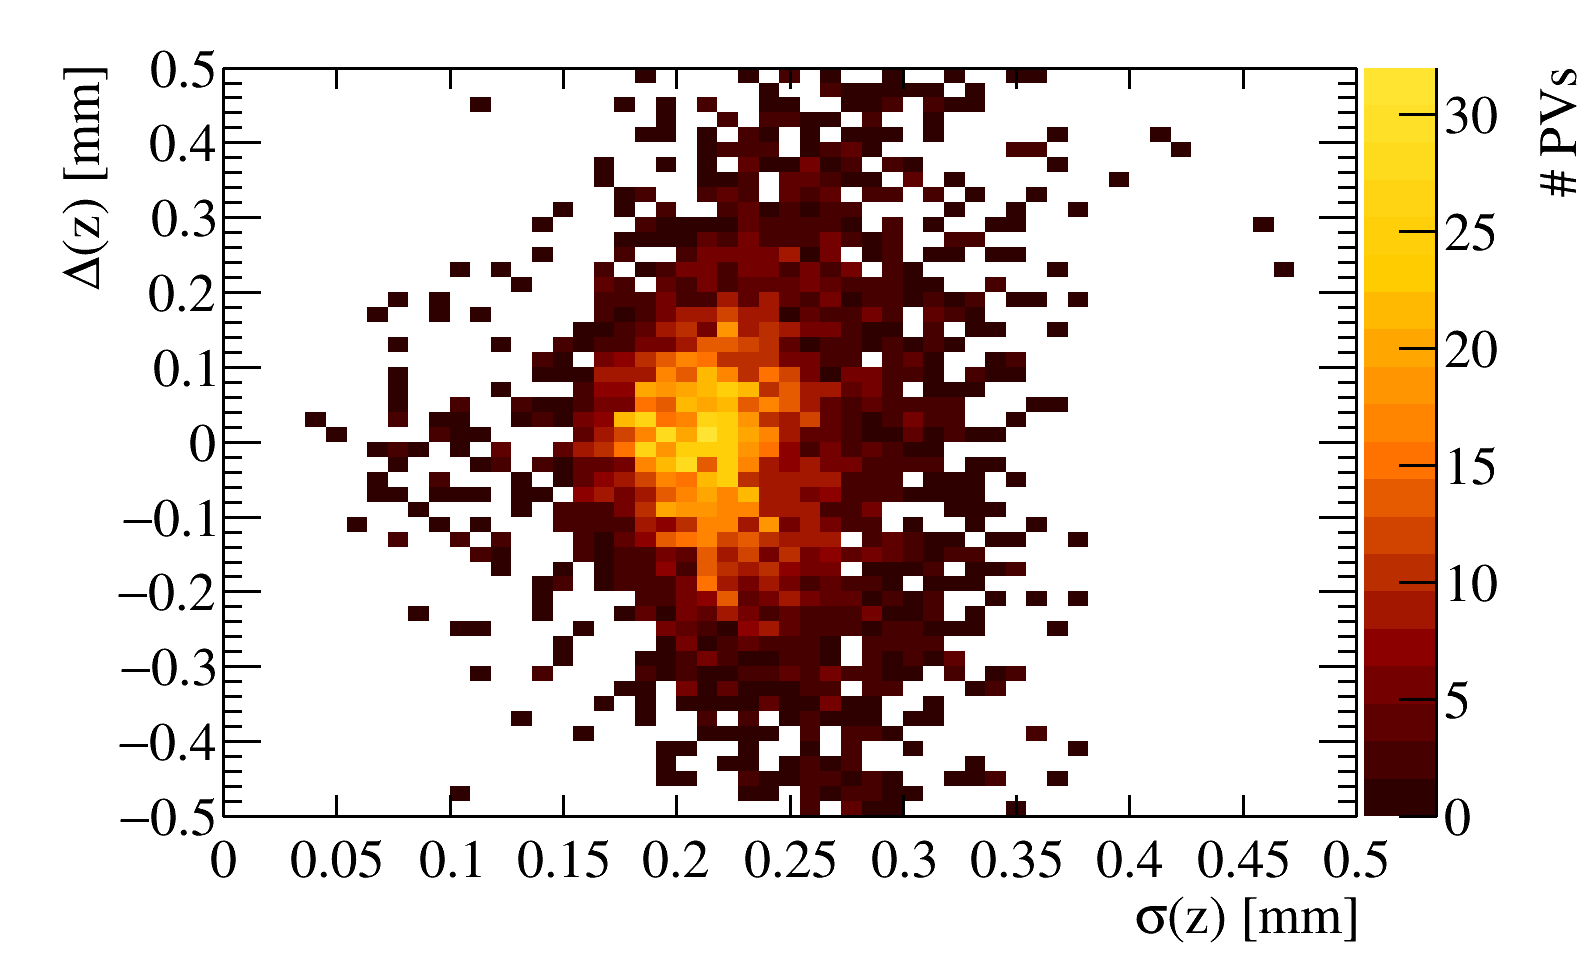

In [24]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=5 && True_PV_nTcks<10 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_5_10_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_10_20_o.pdf has been created


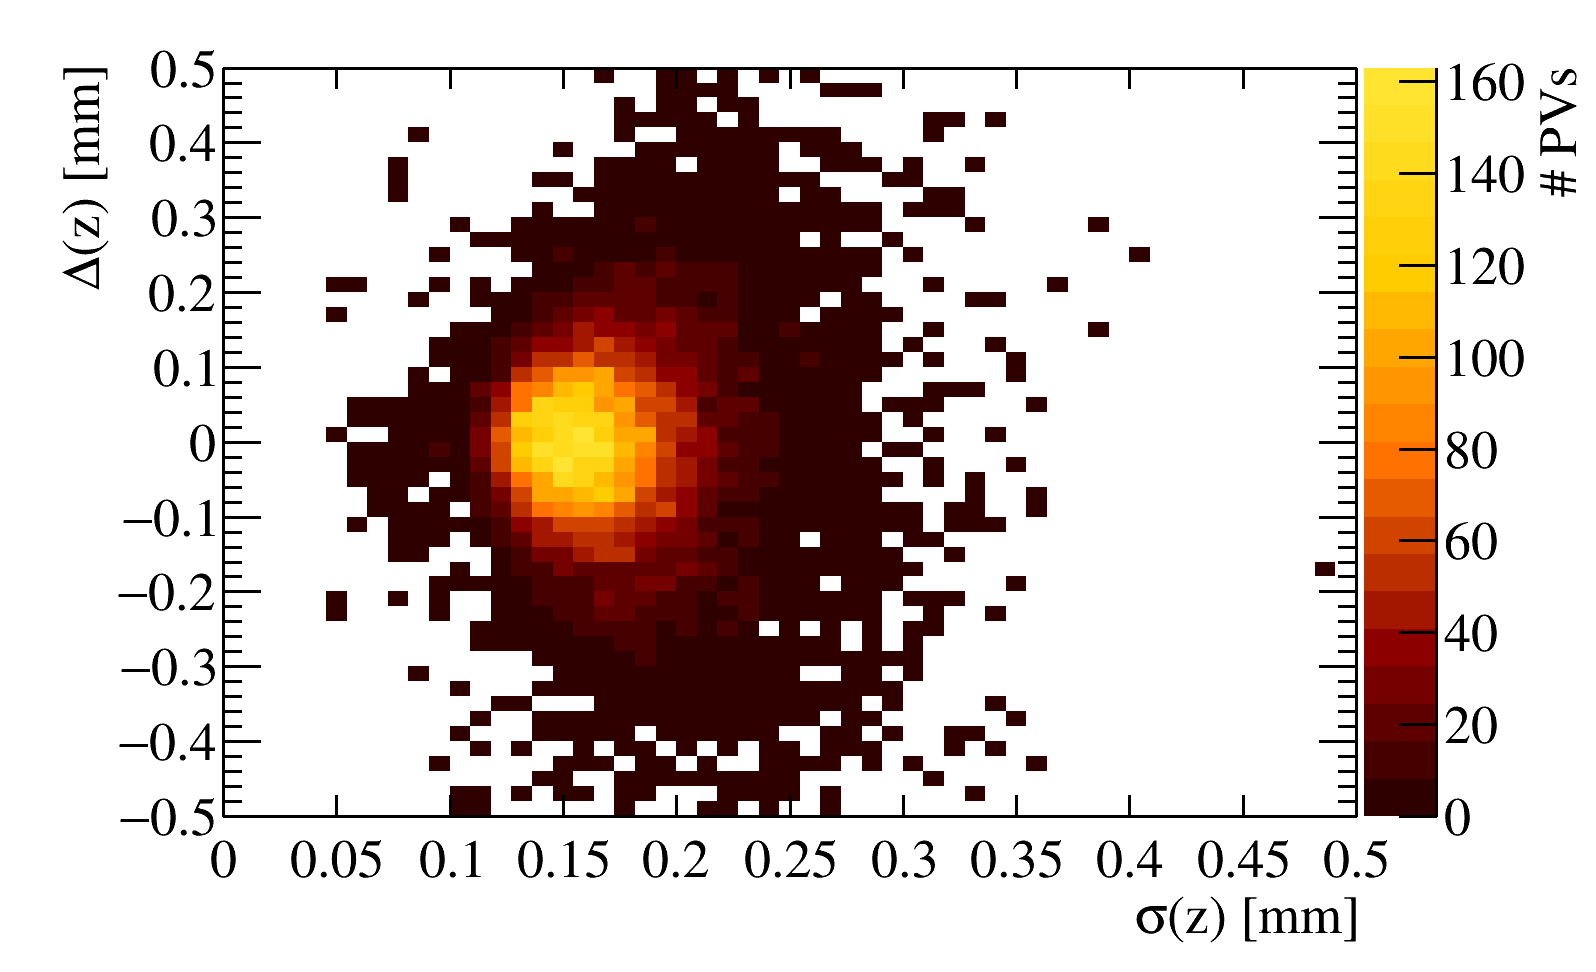

In [25]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=10 && True_PV_nTcks<20 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_10_20_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_20_30_o.pdf has been created


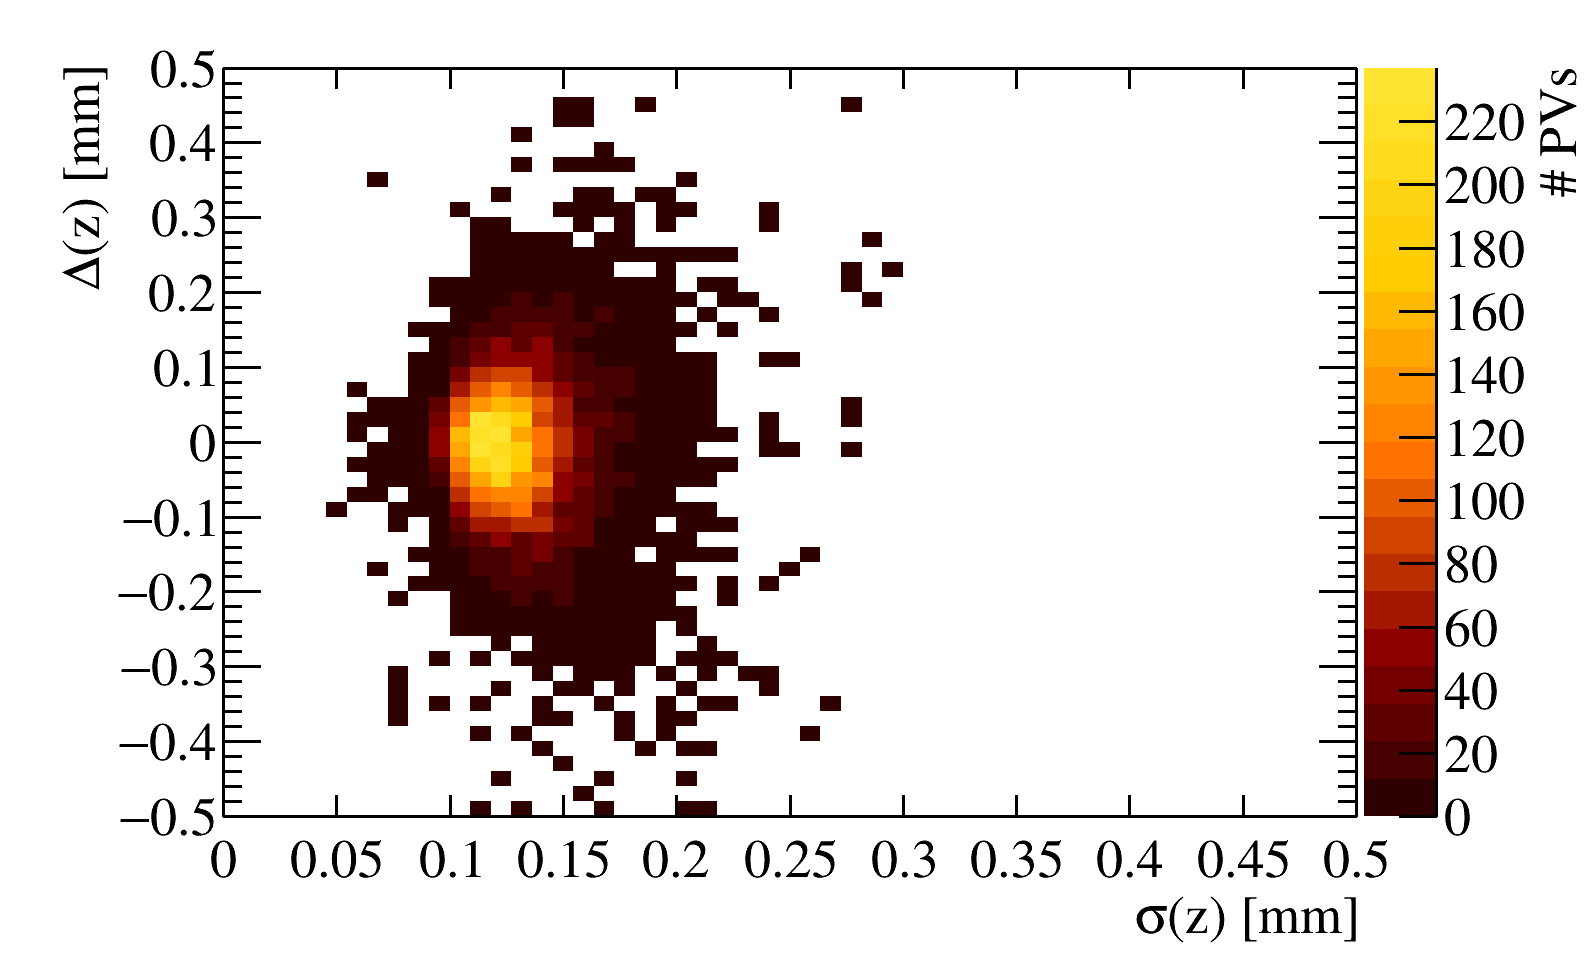

In [26]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=20 && True_PV_nTcks<30 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_20_30_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_30_40_o.pdf has been created


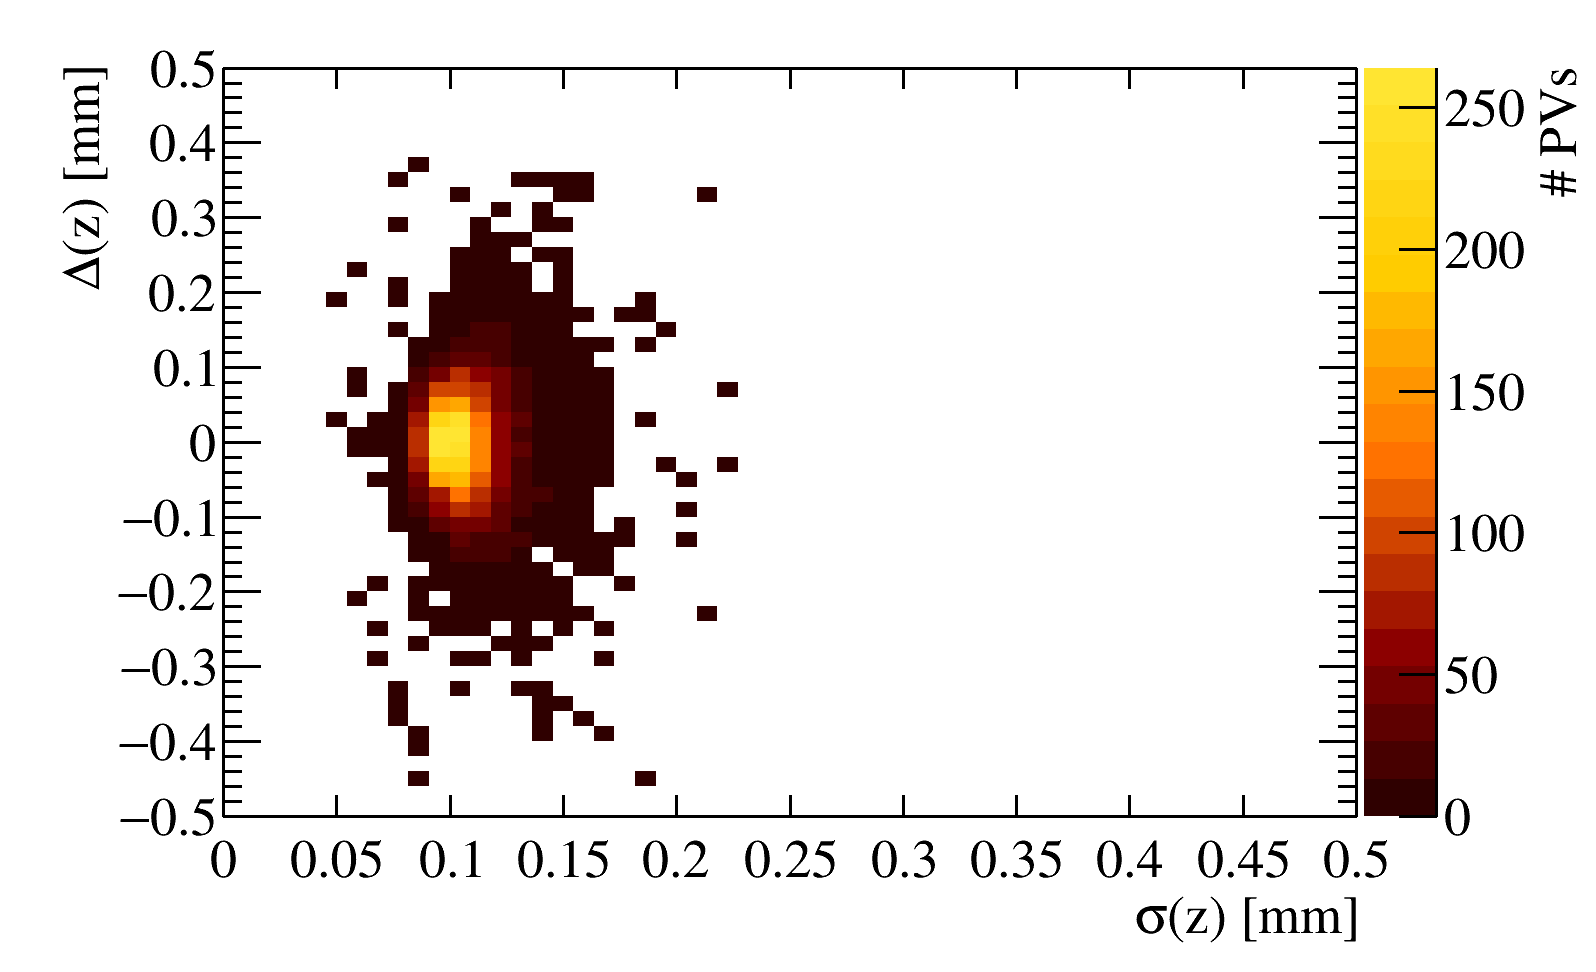

In [27]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=30 && True_PV_nTcks<40 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_30_40_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_40_50_o.pdf has been created


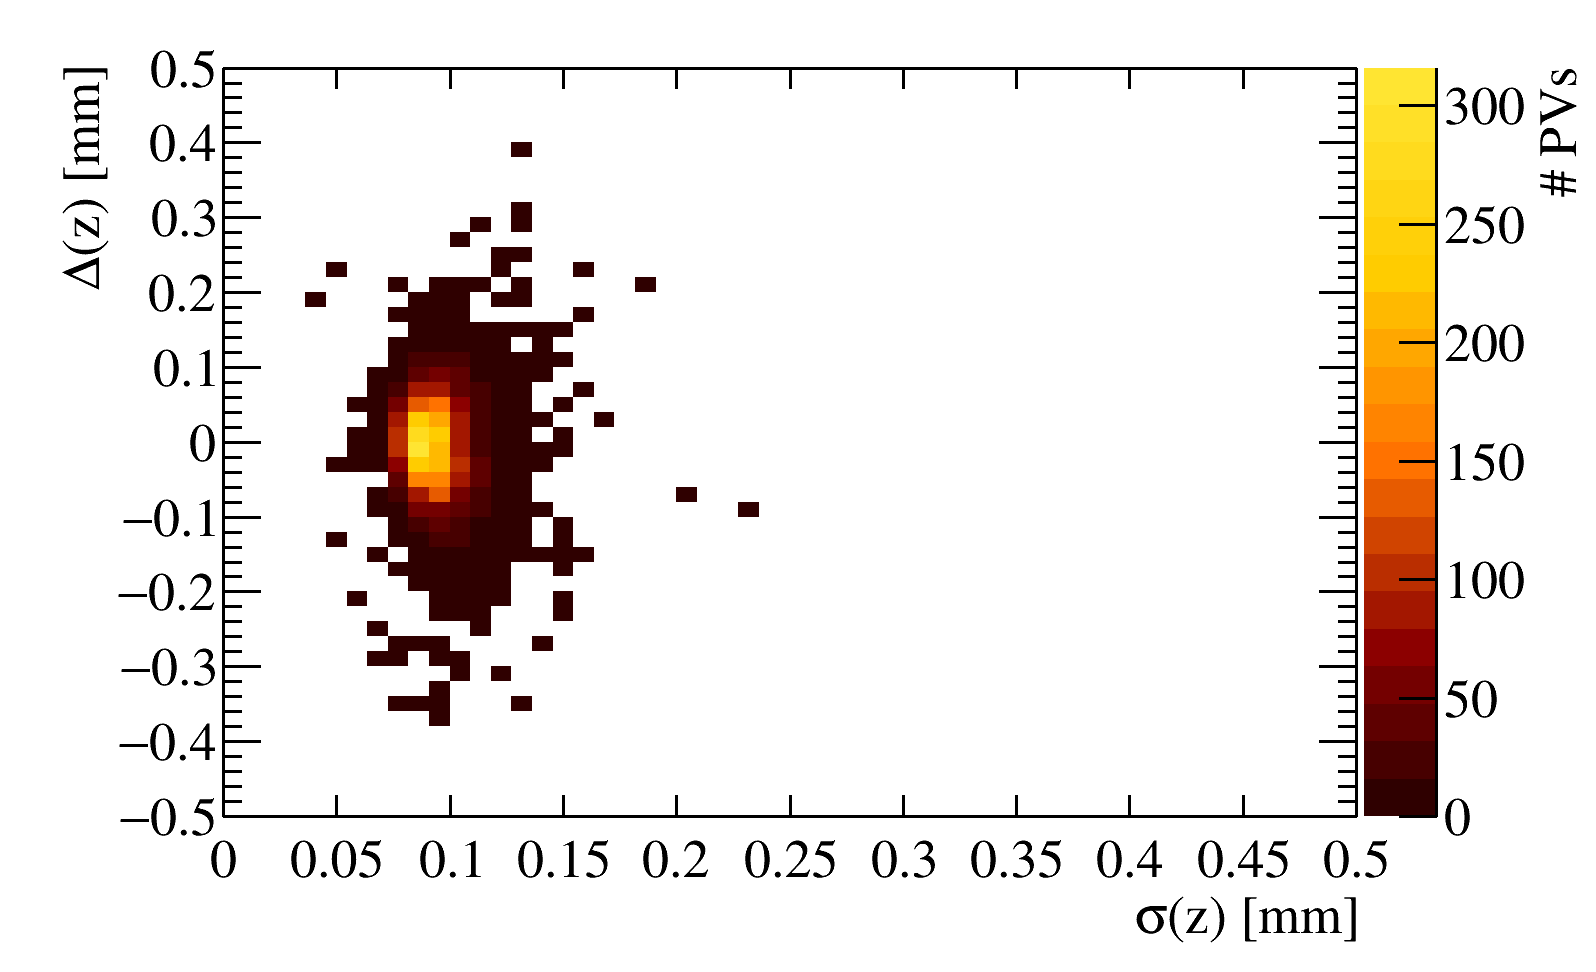

In [28]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=40 && True_PV_nTcks<50 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_40_50_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_50_60_o.pdf has been created


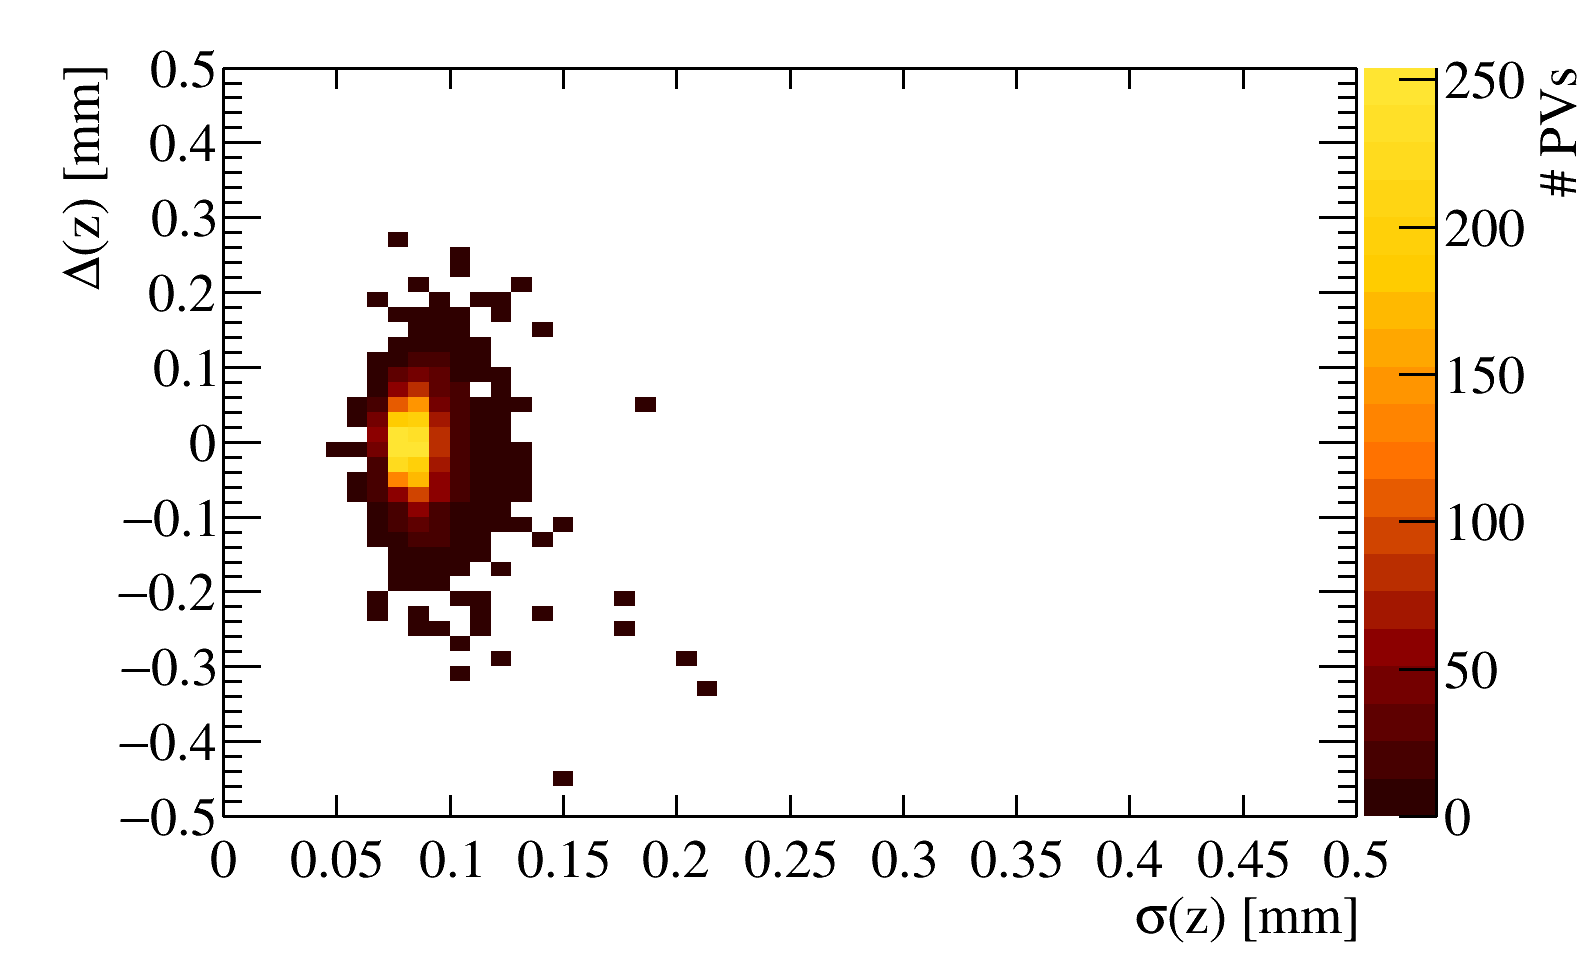

In [29]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=50 && True_PV_nTcks<60 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_50_60_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_60_70_o.pdf has been created


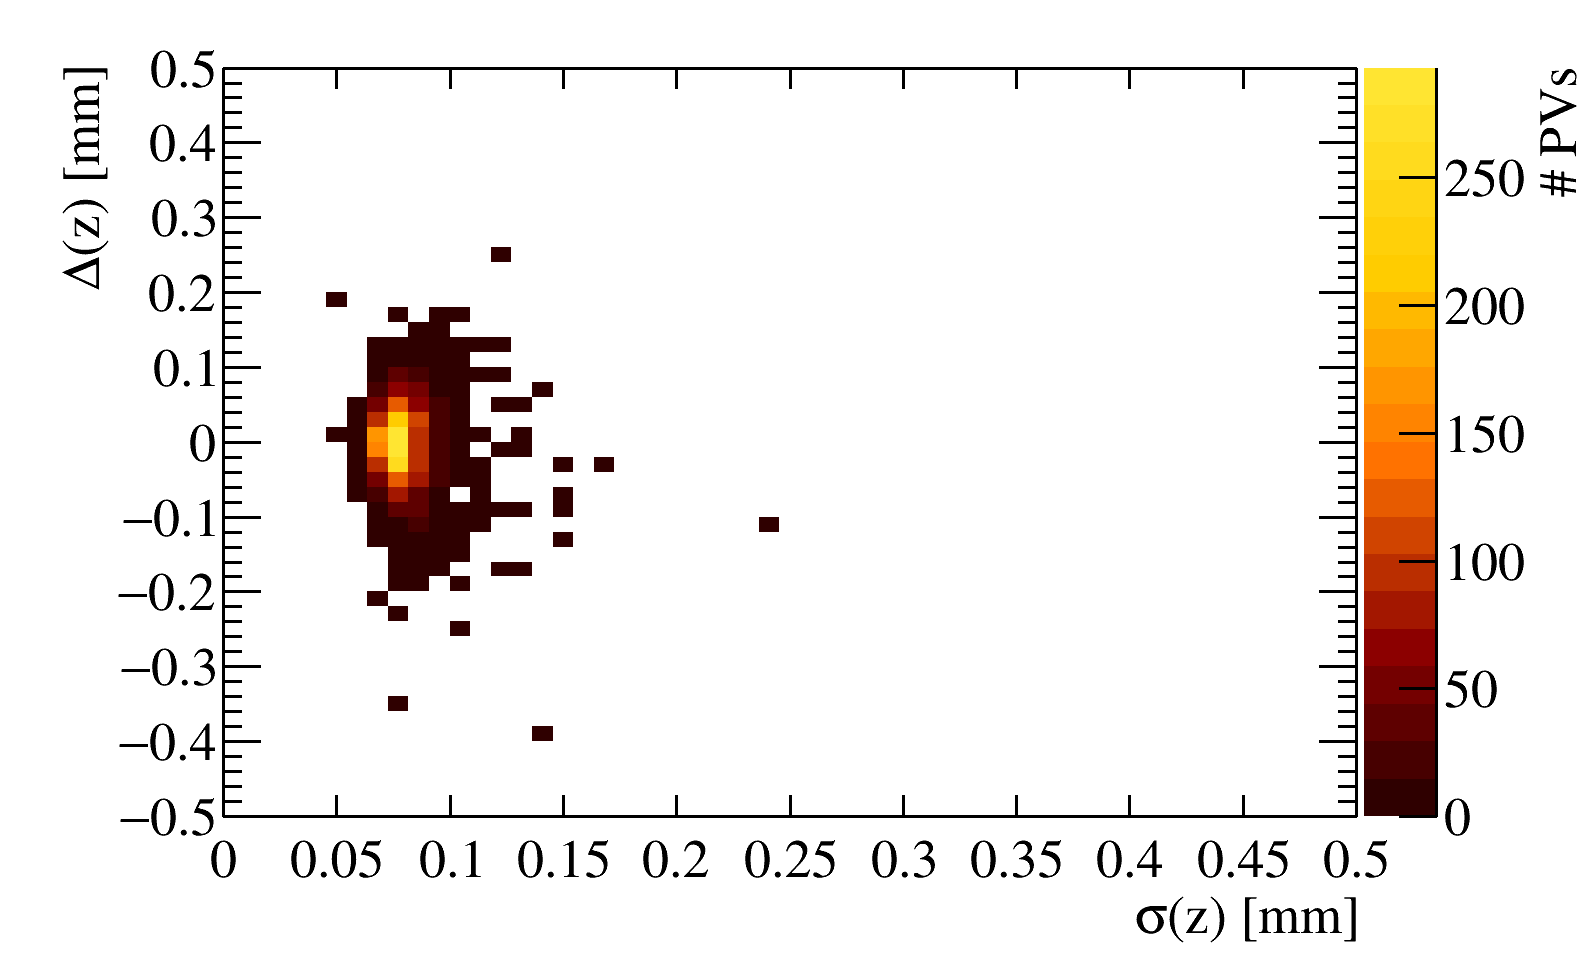

In [30]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=60 && True_PV_nTcks<70 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_60_70_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_70_80_o.pdf has been created


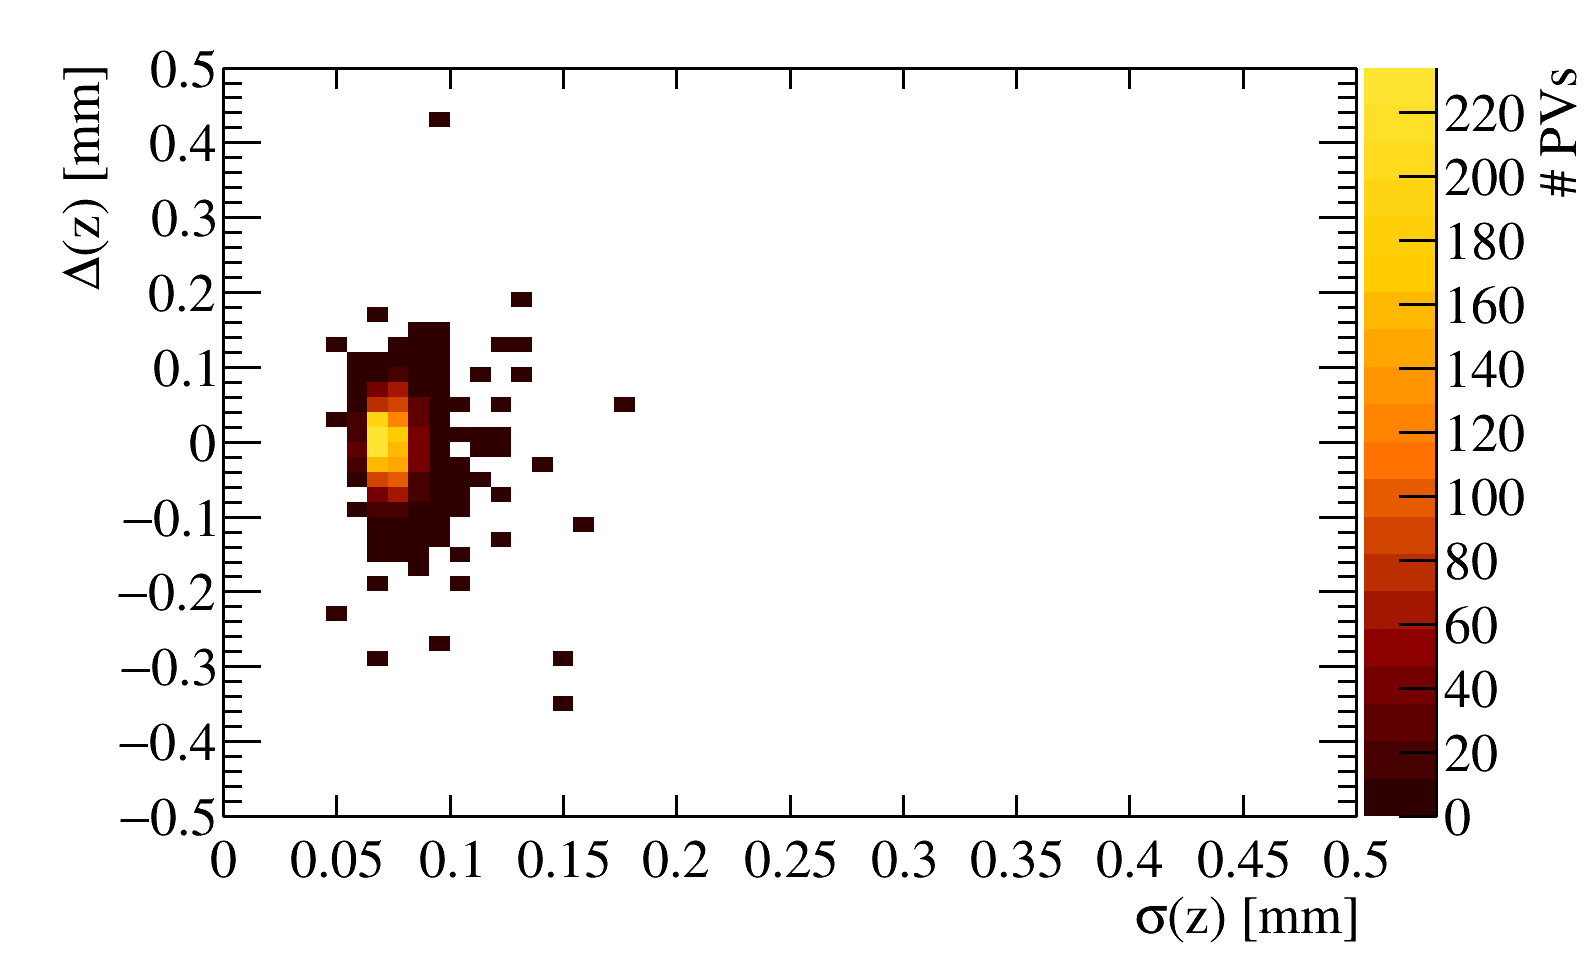

In [31]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=70 && True_PV_nTcks<80 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_70_80_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_80_90_o.pdf has been created


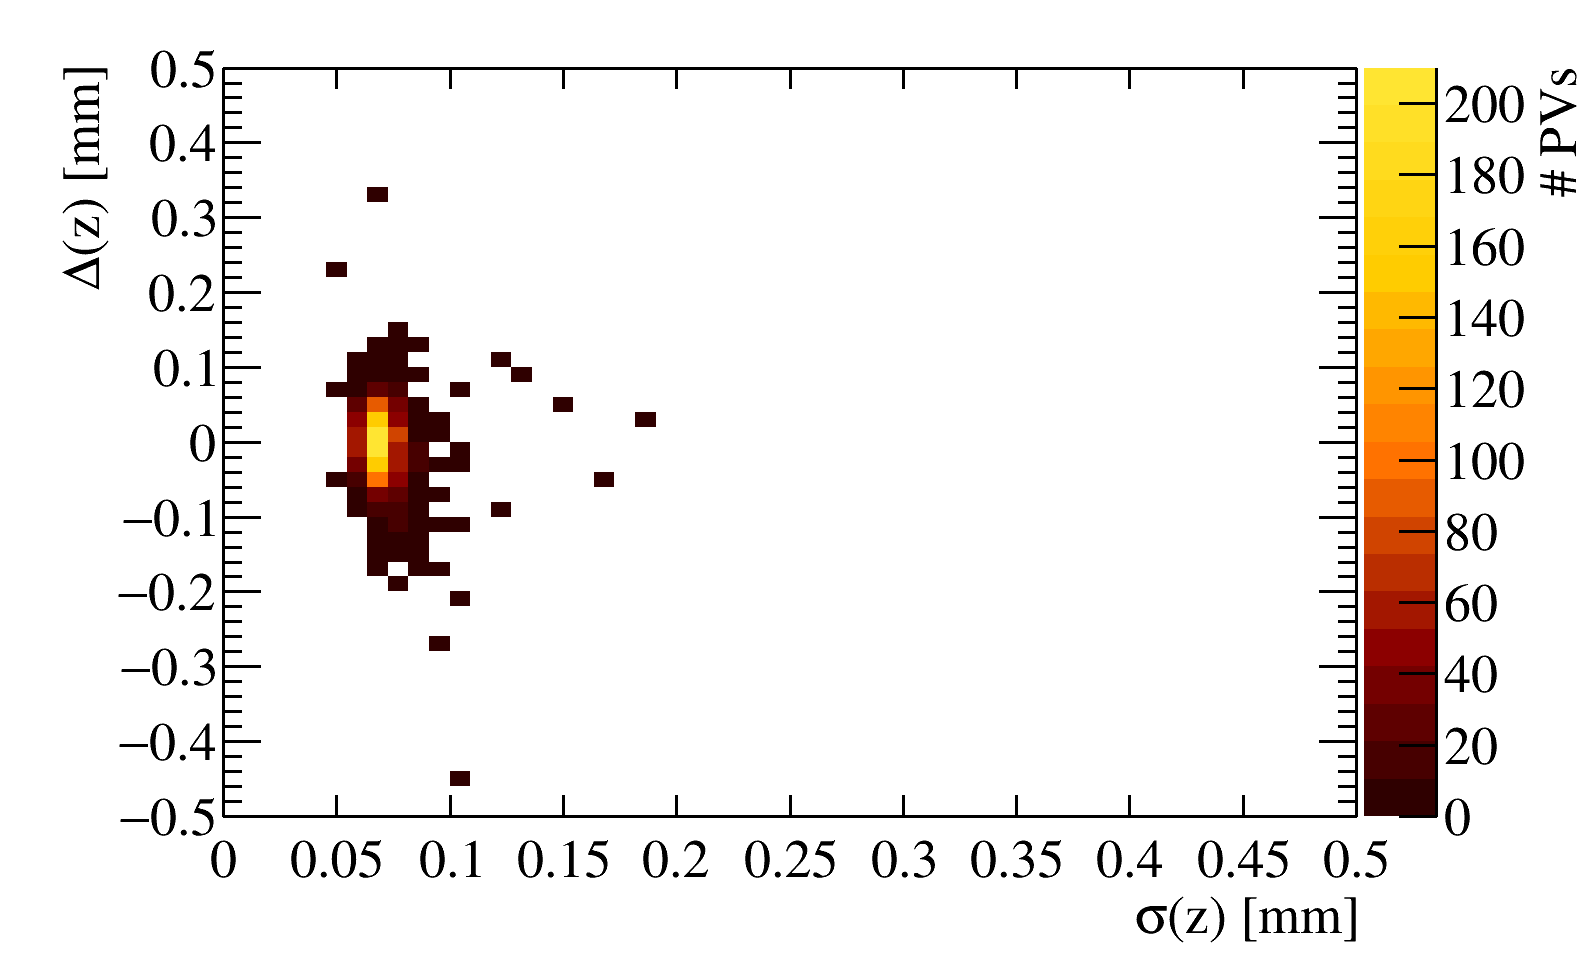

In [32]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=80 && True_PV_nTcks<90 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_80_90_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_90_all_o.pdf has been created


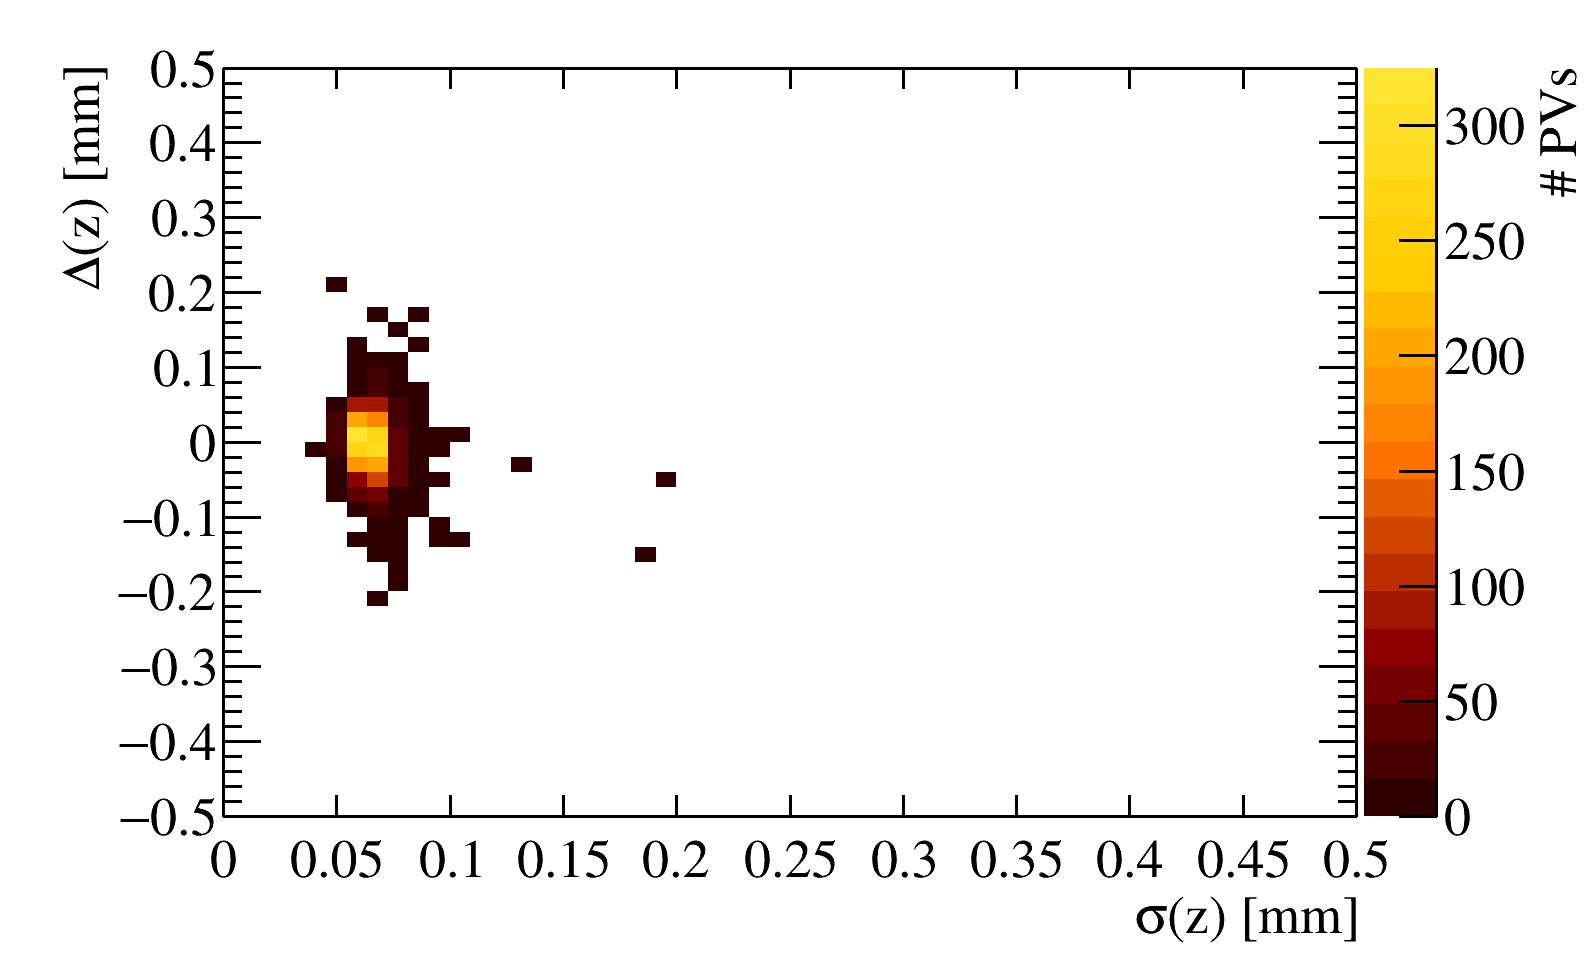

In [33]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",55,0,0.5,50,-0.5,0.5)
h2.SetXTitle("#sigma(z) [mm]")
h2.SetYTitle("#Delta(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("((True_PV_dz_mm)):Pred_PV_matched_res_mm>>RecRes_VS_DeltaZ","PV_match==1  && True_PV_nTcks>=90 ","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecRes_VS_DeltaZ_nTracks_90_all_o.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: RecRes_VS_DeltaZ (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecZ_VS_DeltaZ.pdf has been created


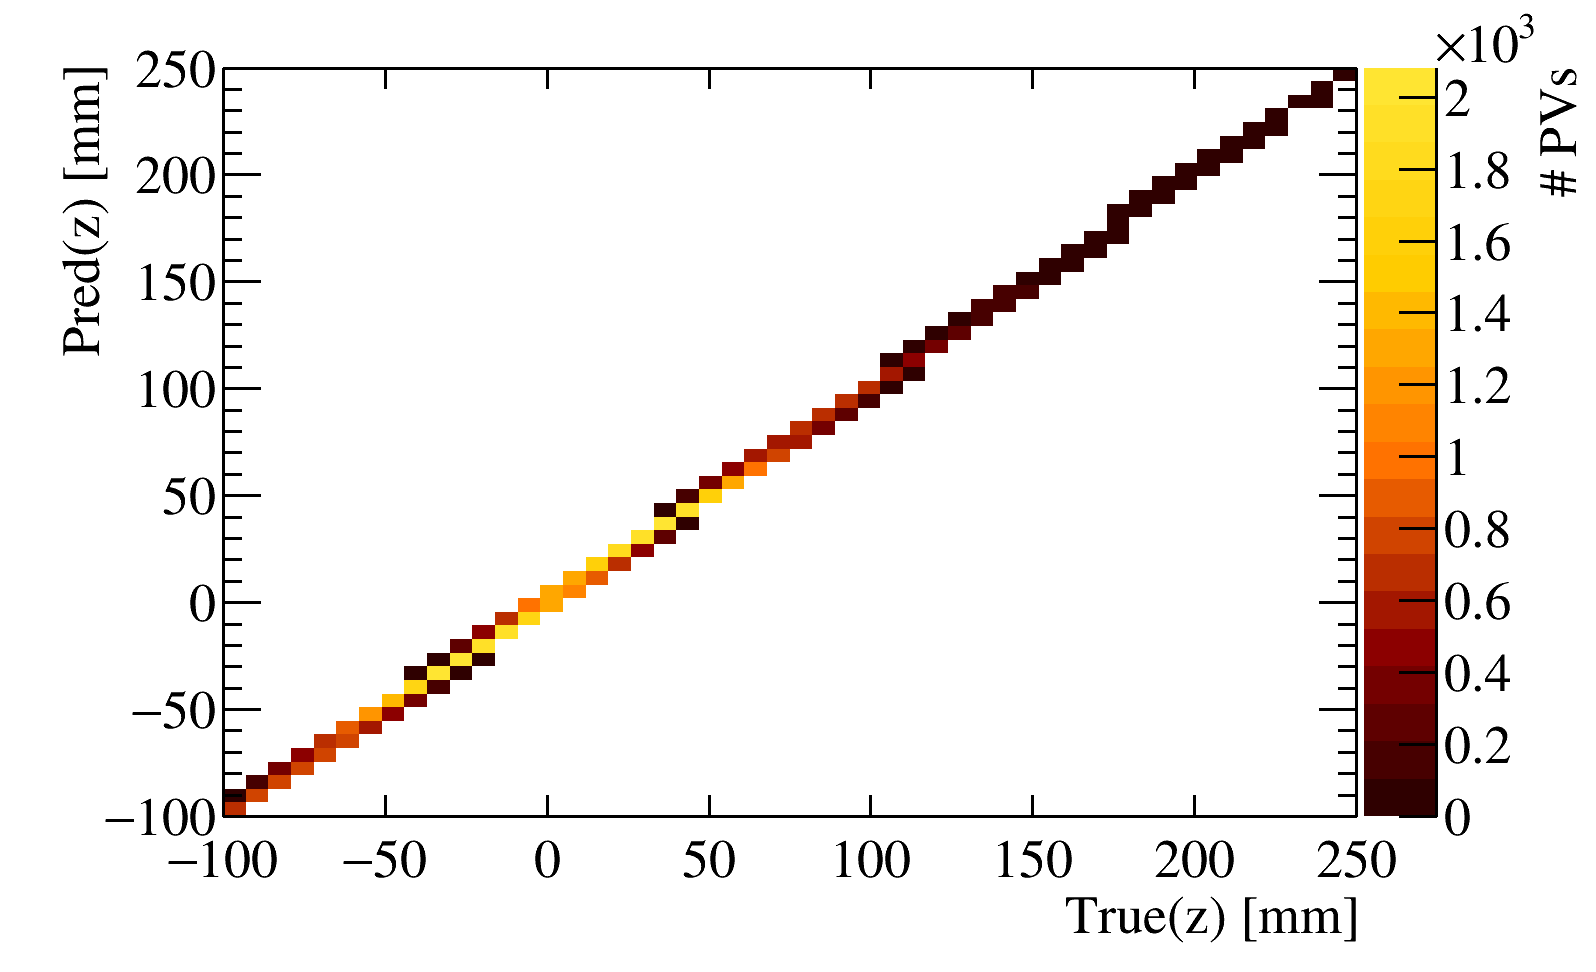

In [34]:
c = TCanvas("c","c",1600,1000)
h2 = TH2D("RecRes_VS_DeltaZ","RecRes_VS_DeltaZ",50,-100,250,55,-100,250)
h2.SetYTitle("Pred(z) [mm]")
h2.SetXTitle("True(z) [mm]")
h2.SetZTitle("# PVs")
h2.GetYaxis().SetMaxDigits(3)
h2.GetXaxis().SetNdivisions(12)
h2.GetZaxis().SetMaxDigits(3)
h2.GetYaxis().SetTitleOffset(0.9)
h2.GetZaxis().SetTitleOffset(0.8)
tree.Draw("(True_PV_z_mm-True_PV_dz_mm):(True_PV_z_mm)>>RecRes_VS_DeltaZ","PV_match==1","colz")
c.Draw("colz")
c.SaveAs("plots_HDplusUNet100A_U32_FP32_27November2023_2p5_after25pcFCpruning/RecZ_VS_DeltaZ.pdf")
